<a href="https://colab.research.google.com/github/jtndr26/Finance-and-Risk-Analytics/blob/main/Finance%26Risk_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case:
- The industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns.
- In most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities.
- **A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors.**
- The portfolio manager has to use the available resources to provide the best solution to the investor.

## Problem Statement:
- Our task is to provide consultation to two different investors, Mr Patrick Jyenger and Mr Peter Jyenger based on their requirements and financial objectives.
- We must perform the required steps for both the individuals after understanding the investor persona independently.

We are provided with the following information for 24 stocks of leading companies listed in New York Stock Exchange(NYSE):
1. Date
2. Open price: Price of stock at the start of the day
3. Close price: Price of stock at the end of the day
4. High price: Highest price reached by the stock on that day
5. Low price: Lowest price reached by the stock on that day
6. Adjusted close price: Stock price adjusted to include the annual returns (dividends) that the company offers to the shareholders
7. Volume traded: Number of stocks traded on the day

## Github Link:
https://github.com/jtndr26/Finance-and-Risk-Analytics/blob/main/Finance%26Risk_Analytics.ipynb

In [1]:
# Importing required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## 1. Reading S&P500 Data

In [3]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
## Changing directory to read dataset
import os
os.chdir(r'/content/drive/My Drive/Feynn_Labs/Finance&Risk')

In [5]:
# Reading S&P500 data from its resp. path
SP = pd.read_csv('S&P500.csv')
SP.head()

Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971   
4  07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059   

     Adj Close      Volume  
0  1146.239990  4298910000  
1  1137.030029  3604110000  
2  1160.750000  4068840000  
3  1159.969971  4073160000  
4  1158.060059  3910550000

In [6]:
SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [7]:
SP['Date'] = pd.to_datetime(SP['Date']) # Changing data type to datetime

In [8]:
SP.head()

Date         Open         High          Low        Close    Adj Close  \
0 2010-01-10  1143.489990  1150.300049  1139.420044  1146.239990  1146.239990   
1 2010-04-10  1144.959961  1148.160034  1131.869995  1137.030029  1137.030029   
2 2010-05-10  1140.680054  1162.760010  1140.680054  1160.750000  1160.750000   
3 2010-06-10  1159.810059  1162.329956  1154.849976  1159.969971  1159.969971   
4 2010-07-10  1161.569946  1163.869995  1151.410034  1158.060059  1158.060059   

       Volume  
0  4298910000  
1  3604110000  
2  4068840000  
3  4073160000  
4  3910550000

In [9]:
SP.shape

(2517, 7)

In [10]:
print(SP.index[SP['Date'] == '2015-01-10'].tolist()) # index at which the date is 1st October 2015

[1258]


**Slicing the dataset to the recent five years i.e. from 1st October 2015 to 30th September 2020**

In [11]:
SP = SP[['Date','Close']].iloc[1258:,:]
SP.rename(columns = {'Close':'S&P'},inplace = True)
SP.reset_index(inplace = True,drop = True)
SP.head()

Date          S&P
0 2015-01-10  1923.819946
1 2015-02-10  1951.359985
2 2015-05-10  1987.050049
3 2015-06-10  1979.920044
4 2015-07-10  1995.829956

As the analysis is needed to be done on Closing Price, we're keeping only Date and Close price column

## Reading Aviation data

In [12]:
# Changing directory to read Aviation data
os.chdir(r'/content/drive/My Drive/Feynn_Labs/Finance&Risk/Aviation')

In [13]:
# Reading multiple files in one go
csvs = [x for x in os.listdir('.') if x.endswith('.csv')]
fav = [os.path.splitext(os.path.basename(x))[0] for x in csvs] # file names
av = {}
for i in range(len(fav)):
    av[fav[i]] = pd.read_csv(csvs[i])
fav

['AAL', 'ALGT', 'ALK', 'DAL', 'HA', 'LUV']

- Aviation Sector has the above following stocks, we'll perform same operations as we did for S&P500 data

In [14]:
for i in range(len(fav)):
    print(fav[i])
    print(av[fav[i]].info())

AAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB
None
ALGT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null 

In [15]:
# Changing data type of Date column from Obj to Datetime
for i in range(len(fav)):
    av[fav[i]]['Date'] = pd.to_datetime(av[fav[i]]['Date'])

In [16]:
av['LUV'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Close      2517 non-null   float64       
 5   Adj Close  2517 non-null   float64       
 6   Volume     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.2 KB


In [17]:
for i in range(len(fav)):
    print(av[fav[i]].shape)

(2517, 7)
(2524, 7)
(2524, 7)
(2524, 7)
(2524, 7)
(2524, 7)


**Dropping columns other than Date and Close**

In [18]:
for i in range(len(fav)):
    print(av[fav[i]].index[av[fav[i]]['Date'] == '2015-01-10'].tolist())

[1258]
[1258]
[1258]
[1258]
[1258]
[1258]


Each dataset has same index where date is 1st October 2015

In [19]:
# Slicing Data from 1st Oct 2015 till 30th sept 2020 and keeping only Date and Close price column
for i in range(len(fav)):
    av[fav[i]] = av[fav[i]][['Date','Close']].iloc[1258:,:]
    av[fav[i]].reset_index(inplace = True,drop = True)

In [20]:
# Merging each data set into one with Date as common column
from functools import reduce
AV = reduce(lambda x,y : pd.merge(x,y,on = 'Date',how = 'inner'),[av[fav[i]] for i in range(len(fav))])
AV.head()

Date    Close_x     Close_y    Close_x    Close_y    Close_x  \
0 2015-01-10  39.200001  217.979996  80.230003  45.410000  24.730000   
1 2015-02-10  38.630001  215.589996  79.260002  44.869999  24.280001   
2 2015-05-10  40.189999  216.059998  80.910004  46.959999  25.500000   
3 2015-06-10  38.130001  208.600006  74.529999  45.090000  24.250000   
4 2015-07-10  39.310001  213.839996  75.970001  45.990002  24.559999   

     Close_y  
0  38.410000  
1  38.380001  
2  39.299999  
3  38.000000  
4  38.709999

In [21]:
# Renaming each columns with their resp. dataset names
fav.insert(0,'Date')
AV.set_axis(fav,axis = 1,inplace = True)

In [22]:
AV.head()

Date        AAL        ALGT        ALK        DAL         HA  \
0 2015-01-10  39.200001  217.979996  80.230003  45.410000  24.730000   
1 2015-02-10  38.630001  215.589996  79.260002  44.869999  24.280001   
2 2015-05-10  40.189999  216.059998  80.910004  46.959999  25.500000   
3 2015-06-10  38.130001  208.600006  74.529999  45.090000  24.250000   
4 2015-07-10  39.310001  213.839996  75.970001  45.990002  24.559999   

         LUV  
0  38.410000  
1  38.380001  
2  39.299999  
3  38.000000  
4  38.709999

In [23]:
AV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   AAL     1259 non-null   float64       
 2   ALGT    1259 non-null   float64       
 3   ALK     1259 non-null   float64       
 4   DAL     1259 non-null   float64       
 5   HA      1259 non-null   float64       
 6   LUV     1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 78.7 KB


## Reading Finance data

In [24]:
# Changing directory to read Finance dataset
os.chdir(r'/content/drive/My Drive/Feynn_Labs/Finance&Risk/Finance')

In [25]:
# Reading multiple files in one go
csvs = [x for x in os.listdir('.') if x.endswith('.csv')]
ff = [os.path.splitext(os.path.basename(x))[0] for x in csvs] # file names
fi = {}
for i in range(len(ff)):
    fi[ff[i]] = pd.read_csv(csvs[i])
ff

['BCS', 'CS', 'DB', 'GS', 'MS', 'WFC']

- Finance Sector has the above following stocks, we'll perform same operations as we did for S&P500 data


In [26]:
for i in range(len(ff)):
    print(ff[i])
    print(fi[ff[i]].info())

BCS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2705 non-null   object 
 1   Open       2705 non-null   float64
 2   High       2705 non-null   float64
 3   Low        2705 non-null   float64
 4   Close      2705 non-null   float64
 5   Adj Close  2705 non-null   float64
 6   Volume     2705 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.4+ KB
None
CS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2705 non-null   object 
 1   Open       2705 non-null   float64
 2   High       2705 non-null   float64
 3   Low        2705 non-null   float64
 4   Close      2705 non-null   float64
 5   Adj Close  2705 non-null   float64
 6   Volume     2705 non-null   float64
dt

In [27]:
# Changing data type of Date column from Obj to Datetime
for i in range(len(ff)):
    fi[ff[i]]['Date'] = pd.to_datetime(fi[ff[i]]['Date'])

In [28]:
fi['BCS'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2705 non-null   datetime64[ns]
 1   Open       2705 non-null   float64       
 2   High       2705 non-null   float64       
 3   Low        2705 non-null   float64       
 4   Close      2705 non-null   float64       
 5   Adj Close  2705 non-null   float64       
 6   Volume     2705 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 148.4 KB


In [29]:
for i in range(len(ff)):
    print(fi[ff[i]].shape)

(2712, 7)
(2712, 7)
(2712, 7)
(2712, 7)
(2712, 7)
(2712, 7)


**Dropping columns other than Date and Close**

In [30]:
for i in range(len(ff)):
    print(fi[ff[i]].index[fi[ff[i]]['Date'] == '2015-01-10'].tolist())

[1446]
[1446]
[1446]
[1446]
[1446]
[1446]


Each dataset has same index where date is 1st October 2015

In [31]:
# Slicing Data from 1st Oct 2015 till 30th sept 2020 and keeping only Date and Close price column.
for i in range(len(ff)):
    fi[ff[i]] = fi[ff[i]][['Date','Close']].iloc[1446:,:]
    fi[ff[i]].reset_index(inplace = True,drop = True)

In [32]:
# Merging each data set into one with Date as common column
F = reduce(lambda x,y : pd.merge(x,y,on = 'Date',how = 'inner'),[fi[ff[i]] for i in range(len(ff))])

In [33]:
# Renaming each columns with their resp. dataset names
ff.insert(0,'Date')
F.set_axis(ff,axis = 1,inplace = True)

In [34]:
F.head()

Date    BCS         CS         DB          GS         MS        WFC
0 2015-01-10  15.01  24.090000  26.520000  176.020004  31.500000  51.439999
1 2015-02-10  15.39  24.639999  27.139999  177.009995  31.430000  51.259998
2 2015-05-10  15.60  25.160000  28.200001  180.699997  32.290001  52.410000
3 2015-06-10  15.55  25.379999  28.400000  180.320007  32.360001  52.029999
4 2015-07-10  15.73  25.320000  28.790001  182.229996  32.930000  52.189999

In [35]:
F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118908 entries, 0 to 118907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   BCS     1259 non-null   float64       
 2   CS      1259 non-null   float64       
 3   DB      1259 non-null   float64       
 4   GS      1259 non-null   float64       
 5   MS      1259 non-null   float64       
 6   WFC     1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 7.3 MB


In [36]:
# Dropping null data
F.dropna(axis = 0,inplace = True)
F.shape

(1259, 7)

## Reading Pharma_Healthcare data

In [37]:
# Changing directory to read Pharma & Healthcare data
os.chdir(r'/content/drive/My Drive/Feynn_Labs/Finance&Risk/Pharma_Healthcare')

In [38]:
# Reading multiple files in one go
csvs = [x for x in os.listdir('.') if x.endswith('.csv')]
fph = [os.path.splitext(os.path.basename(x))[0] for x in csvs] # file names
ph = {}
for i in range(len(fph)):
    ph[fph[i]] = pd.read_csv(csvs[i])
fph

['BHC', 'MRK', 'JNJ', 'RHHBY', 'UNH', 'PFE']

- Pharma & Healthcare Sector has the above following stocks, we'll perform same operations as we did for S&P500 data


In [39]:
for i in range(len(fph)):
    print(fph[i])
    print(ph[fph[i]].info())

BHC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB
None
MRK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
d

In [40]:
# Changing data type of Date column from Obj to Datetime
for i in range(len(fph)):
    ph[fph[i]]['Date'] = pd.to_datetime(ph[fph[i]]['Date'])

In [41]:
for i in range(len(fph)):
    print(ph[fph[i]].shape)

(2525, 7)
(2525, 7)
(2525, 7)
(2525, 7)
(2525, 7)
(2525, 7)


In [42]:
for i in range(len(fph)):
    print(ph[fph[i]].index[ph[fph[i]]['Date'] == '2015-01-10'].tolist())

[1258]
[1258]
[1258]
[1258]
[1258]
[1258]


Each dataset has same index where date is 1st October 2015

In [43]:
# Slicing Data from 1st Oct 2015 till 30th sept 2020 and keeping only Date and Close price column.
for i in range(len(fph)):
    ph[fph[i]] = ph[fph[i]][['Date','Close']].iloc[1258:,:]
    ph[fph[i]].reset_index(inplace = True,drop = True)

In [44]:
# Merging each data set into one with Date as common column
PH = reduce(lambda x,y : pd.merge(x,y,on = 'Date',how = 'inner'),[ph[fph[i]] for i in range(len(fph))])

In [45]:
# Renaming each columns with their resp. dataset names
fph.insert(0,'Date')
PH.set_axis(fph,axis = 1,inplace = True)

In [46]:
PH.head()

Date         BHC        MRK        JNJ      RHHBY         UNH  \
0 2015-01-10  179.600006  49.369999  93.169998  33.220001  116.610001   
1 2015-02-10  182.320007  50.139999  93.930000  33.320000  118.830002   
2 2015-05-10  163.460007  51.230000  94.760002  33.439999  119.650002   
3 2015-06-10  166.000000  49.799999  93.419998  33.529999  116.050003   
4 2015-07-10  169.830002  50.950001  94.980003  32.549999  116.430000   

         PFE  
0  31.840000  
1  33.080002  
2  33.480000  
3  32.790001  
4  33.290001

In [47]:
PH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263403 entries, 0 to 263402
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   BHC     1259 non-null   float64       
 2   MRK     1259 non-null   float64       
 3   JNJ     1259 non-null   float64       
 4   RHHBY   1259 non-null   float64       
 5   UNH     1259 non-null   float64       
 6   PFE     1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.1 MB


In [48]:
# Dropping null data
PH.dropna(axis = 0,inplace = True)
PH.shape

(1259, 7)

## Reading Technology data

In [49]:
# Changing directory to read IT/Technology data
os.chdir(r'/content/drive/My Drive/Feynn_Labs/Finance&Risk/Technology')

In [50]:
# Reading multiple files in one go
csvs = [x for x in os.listdir('.') if x.endswith('.csv')]
ft = [os.path.splitext(os.path.basename(x))[0] for x in csvs] # file names
t = {}
for i in range(len(ft)):
    t[ft[i]] = pd.read_csv(csvs[i])
ft

['AAPL', 'AMZN', 'FB', 'GOOG', 'IBM', 'MSFT']

- Aviation Sector has the above following stocks, we'll perform same operations as we did for S&P500 data

In [51]:
for i in range(len(ft)):
    print(ft[i])
    print(t[ft[i]].info())

AAPL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB
None
AMZN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null

In [52]:
# Changing data type of Date column from Obj to Datetime
for i in range(len(ft)):
    t[ft[i]]['Date'] = pd.to_datetime(t[ft[i]]['Date'])

In [53]:
for i in range(len(ft)):
    print(t[ft[i]].shape)

(2517, 7)
(2524, 7)
(2113, 7)
(2524, 7)
(2524, 7)
(2524, 7)


In [54]:
for i in range(len(ft)):
    print(t[ft[i]].index[t[ft[i]]['Date'] == '2015-01-10'].tolist())

[1258]
[1258]
[847]
[1258]
[1258]
[1258]


Each dataset has same index where date is 1st October 2015 except fot FB, FB some different index

In [55]:
t['FB'].head(8)

Date       Open       High        Low      Close  Adj Close  \
0 2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1 2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2 2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3 2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4 2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   
5 2012-05-25  32.900002  32.950001  31.110001  31.910000  31.910000   
6 2012-05-29  31.480000  31.690001  28.650000  28.840000  28.840000   
7 2012-05-30  28.700001  29.549999  27.860001  28.190001  28.190001   

        Volume  
0  573576400.0  
1  168192700.0  
2  101786600.0  
3   73600000.0  
4   50237200.0  
5   37149800.0  
6   78063400.0  
7   57267900.0

For other stocks the data is collected from year 2010, but since FB's stock was launched in 2012 it has different index for the date of 1st Oct 2015

In [56]:
# Dropping FB from Techonology list temporarily
ft.pop(2)
ft

['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT']

In [57]:
# Slicing FB dataset from its resp. index viz. 847 and keeping only Date and Close price column
t['FB'] = t['FB'][['Date','Close']].iloc[847:,:]
t['FB'].reset_index(inplace = True,drop = True)

In [58]:
t['FB'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   Close   1259 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.9 KB


In [59]:
# Slicing Data from 1st Oct 2015 till 30th sept 2020 and keeping only Date and Close price column.
for i in range(len(ft)):
    t[ft[i]] = t[ft[i]][['Date','Close']].iloc[1258:,:]
    t[ft[i]].reset_index(inplace = True,drop = True)

In [60]:
# Inserting FB back into the Technology list
ft.insert(2,'FB')
ft

['AAPL', 'AMZN', 'FB', 'GOOG', 'IBM', 'MSFT']

In [61]:
# Merging each data set into one with Date as common column
T = reduce(lambda x,y : pd.merge(x,y,on = 'Date',how = 'inner'),[t[ft[i]] for i in range(len(ft))])

In [62]:
# Renaming each columns with their resp. dataset names
ft.insert(0,'Date')
T.set_axis(ft,axis = 1,inplace = True)

In [63]:
T.head()

Date       AAPL        AMZN         FB        GOOG         IBM  \
0 2015-01-10  27.395000  520.719971  90.949997  611.289978  143.589996   
1 2015-02-10  27.594999  532.539978  92.070000  626.909973  144.580002   
2 2015-05-10  27.695000  543.679993  94.010002  641.469971  149.039993   
3 2015-06-10  27.827499  537.479980  92.800003  645.440002  148.779999   
4 2015-07-10  27.695000  541.940002  92.400002  642.359985  150.089996   

        MSFT  
0  44.610001  
1  45.570000  
2  46.630001  
3  46.750000  
4  46.799999

In [64]:
T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   AAPL    1259 non-null   float64       
 2   AMZN    1259 non-null   float64       
 3   FB      1259 non-null   float64       
 4   GOOG    1259 non-null   float64       
 5   IBM     1259 non-null   float64       
 6   MSFT    1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 78.7 KB


In [65]:
# Changing Directory back to its original path
os.chdir(r'/content/drive/My Drive/Feynn_Labs/Finance&Risk')

Now that we've clubbed the close prices of each stocks for every dataset(Sector), let us Visulaize further so that we are able to shorlist the appropriate stocks according to the clients requirements

## Data Visualization

**Visualising Aviation data**

In [66]:
# Importing Plotly for visualisation
import plotly.express as px

The reason for using plotly over seaborn is it will allow us to get interactive visuals as there are many data columns in each dataset.

In [67]:
AV['Date'] = AV['Date'].dt.strftime('%Y/%m/%d')

Converting Date column for datetime to string in order to make it workable with plotly.

In [68]:
fig = px.line(AV,x = 'Date',y = fav,template='plotly_white')
fig.show()

In Aviation it looks like ALGT is performing way better than others, let's further analyze how this sector is performing.

**Analysing Aviation Stocks**

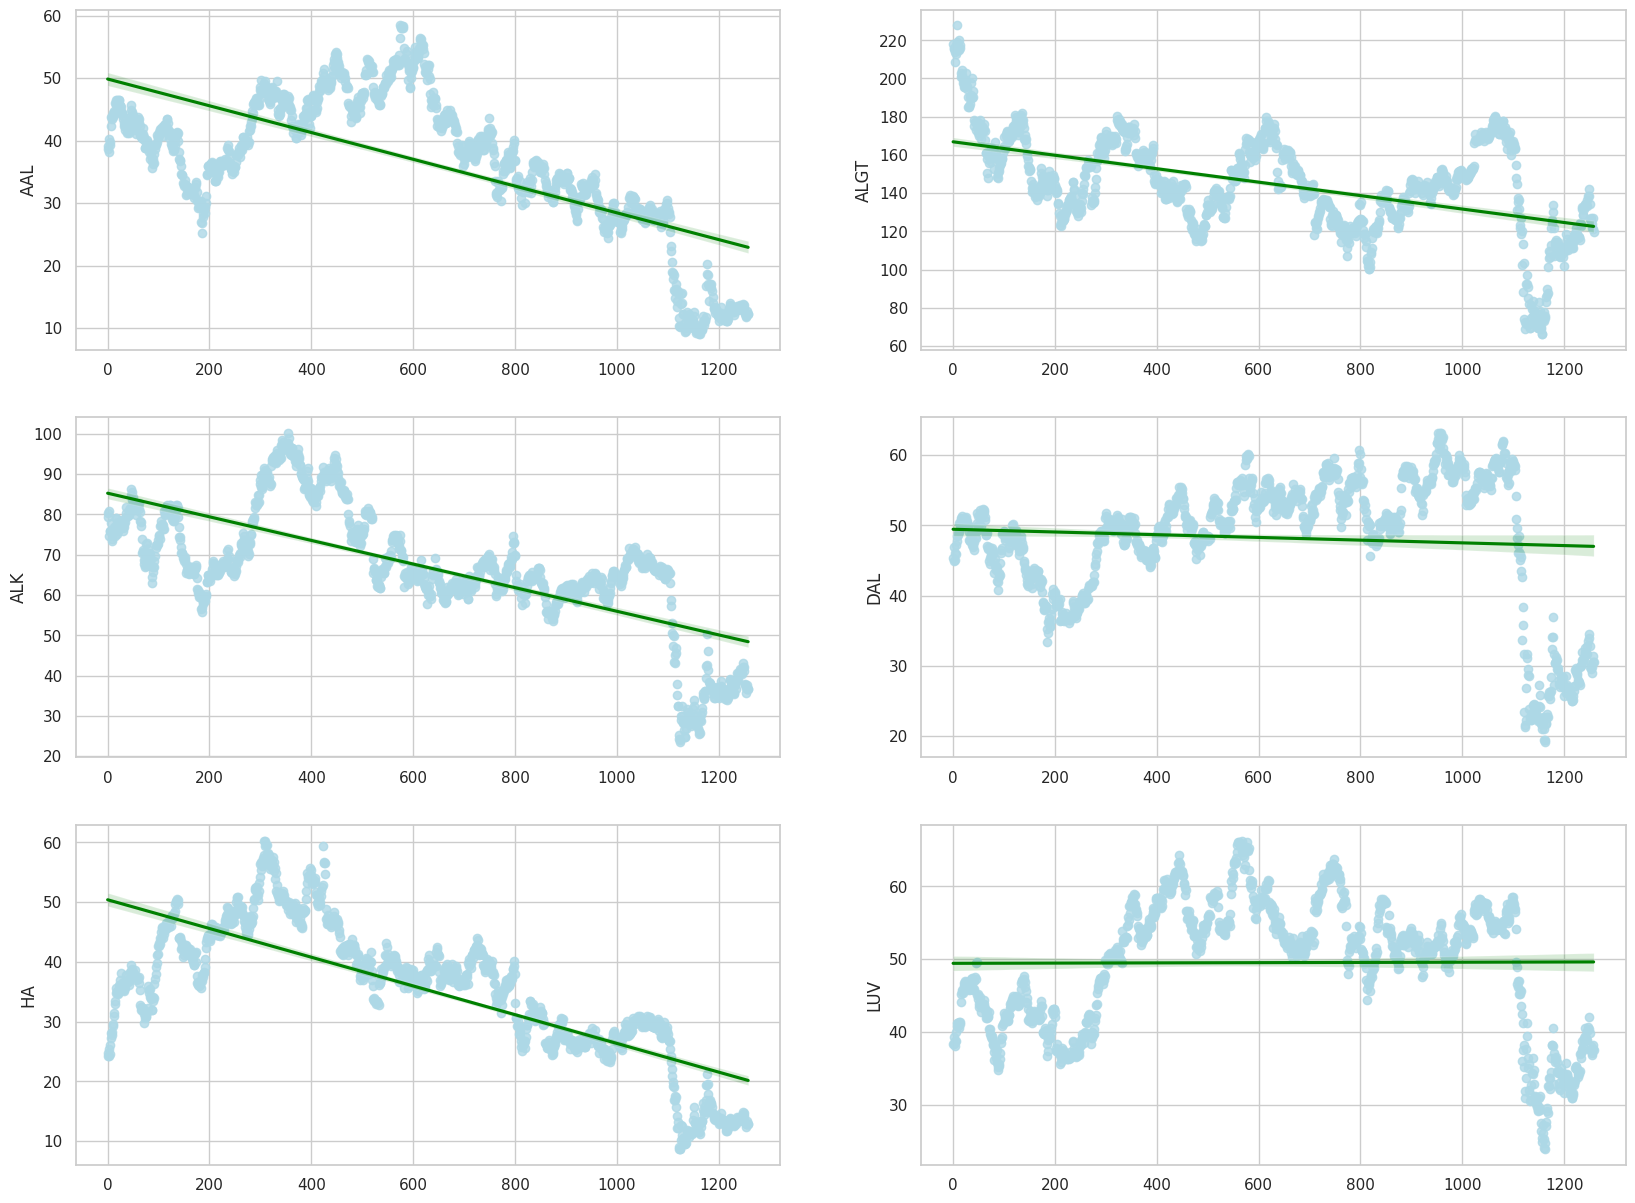

In [69]:
# Creating Regplot for each stocks in Aviation sector.
plt.figure(figsize = (20,15))
sns.set(style = 'whitegrid')
for i in range(1,len(fav)):
    plt.subplot(3,2,i)
    sns.regplot(data = AV,x = AV.index,y = AV[fav[i]],scatter_kws={"color": "lightblue"}, line_kws={"color": "green"})
plt.show()

The above regplot suggest except DAL and LUV rest other stocks from Aviation are loss making,to have a concrete selection let's check some numbers.

In [70]:
# Comparing price at the start and end of the five year period
pd.concat([AV.iloc[0:1,1:],AV.iloc[-1:,1:]],axis = 0)

AAL        ALGT        ALK    DAL     HA    LUV
0     39.200001  217.979996  80.230003  45.41  24.73  38.41
1258  12.290000  119.800003  36.630001  30.58  12.89  37.50

In [71]:
pd.concat([AV.iloc[0:1,1:],AV.iloc[-1:,1:]],axis = 0).diff(axis = 0)

AAL       ALGT        ALK    DAL     HA   LUV
0           NaN        NaN        NaN    NaN    NaN   NaN
1258 -26.910001 -98.179993 -43.600002 -14.83 -11.84 -0.91

The above numbers suggests that none of the stocks from Aviation sector are producing profits, the reason for this may be the **Corona Pandemic** that broke out at the end of 2019 and the industries related to Travel,Tourism and Hospitality were at a halt.

In [72]:
# Adding prefixe "AVI" to the columns in Aviation dataset.
AV.columns = [f'AVI_{i}' if i not in ['Date'] else f'{i}' for i in AV.columns]
AV.head()

Date    AVI_AAL    AVI_ALGT    AVI_ALK    AVI_DAL     AVI_HA  \
0  2015/01/10  39.200001  217.979996  80.230003  45.410000  24.730000   
1  2015/02/10  38.630001  215.589996  79.260002  44.869999  24.280001   
2  2015/05/10  40.189999  216.059998  80.910004  46.959999  25.500000   
3  2015/06/10  38.130001  208.600006  74.529999  45.090000  24.250000   
4  2015/07/10  39.310001  213.839996  75.970001  45.990002  24.559999   

     AVI_LUV  
0  38.410000  
1  38.380001  
2  39.299999  
3  38.000000  
4  38.709999

In [73]:
# Creating a new dataset "STK" that is merged result of SP and LUV column from Aviation dataset.
STK = pd.concat([SP,AV['AVI_LUV']],axis = 1 )
STK.head()

Date          S&P    AVI_LUV
0 2015-01-10  1923.819946  38.410000
1 2015-02-10  1951.359985  38.380001
2 2015-05-10  1987.050049  39.299999
3 2015-06-10  1979.920044  38.000000
4 2015-07-10  1995.829956  38.709999

Even though *AVI_LUV* is loss making stock we still select this company as we dont have the knowledge of rest other stocks in other sectors.

In [74]:
STK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1259 non-null   datetime64[ns]
 1   S&P      1259 non-null   float64       
 2   AVI_LUV  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 29.6 KB


## Visualising Finance data

In [75]:
# Converting Date column for datetime to string in order to make it workable with plotly.
F['Date'] = F['Date'].dt.strftime('%Y/%m/%d')

In [76]:
fig = px.line(F,x = F['Date'],y = ff,template='plotly_white')
fig.show()

The above visual suggests *GS* stocks are better performer in the Finance sector. Lets look at some visuals to have more clarity.

**Analysing Finance Stocks**

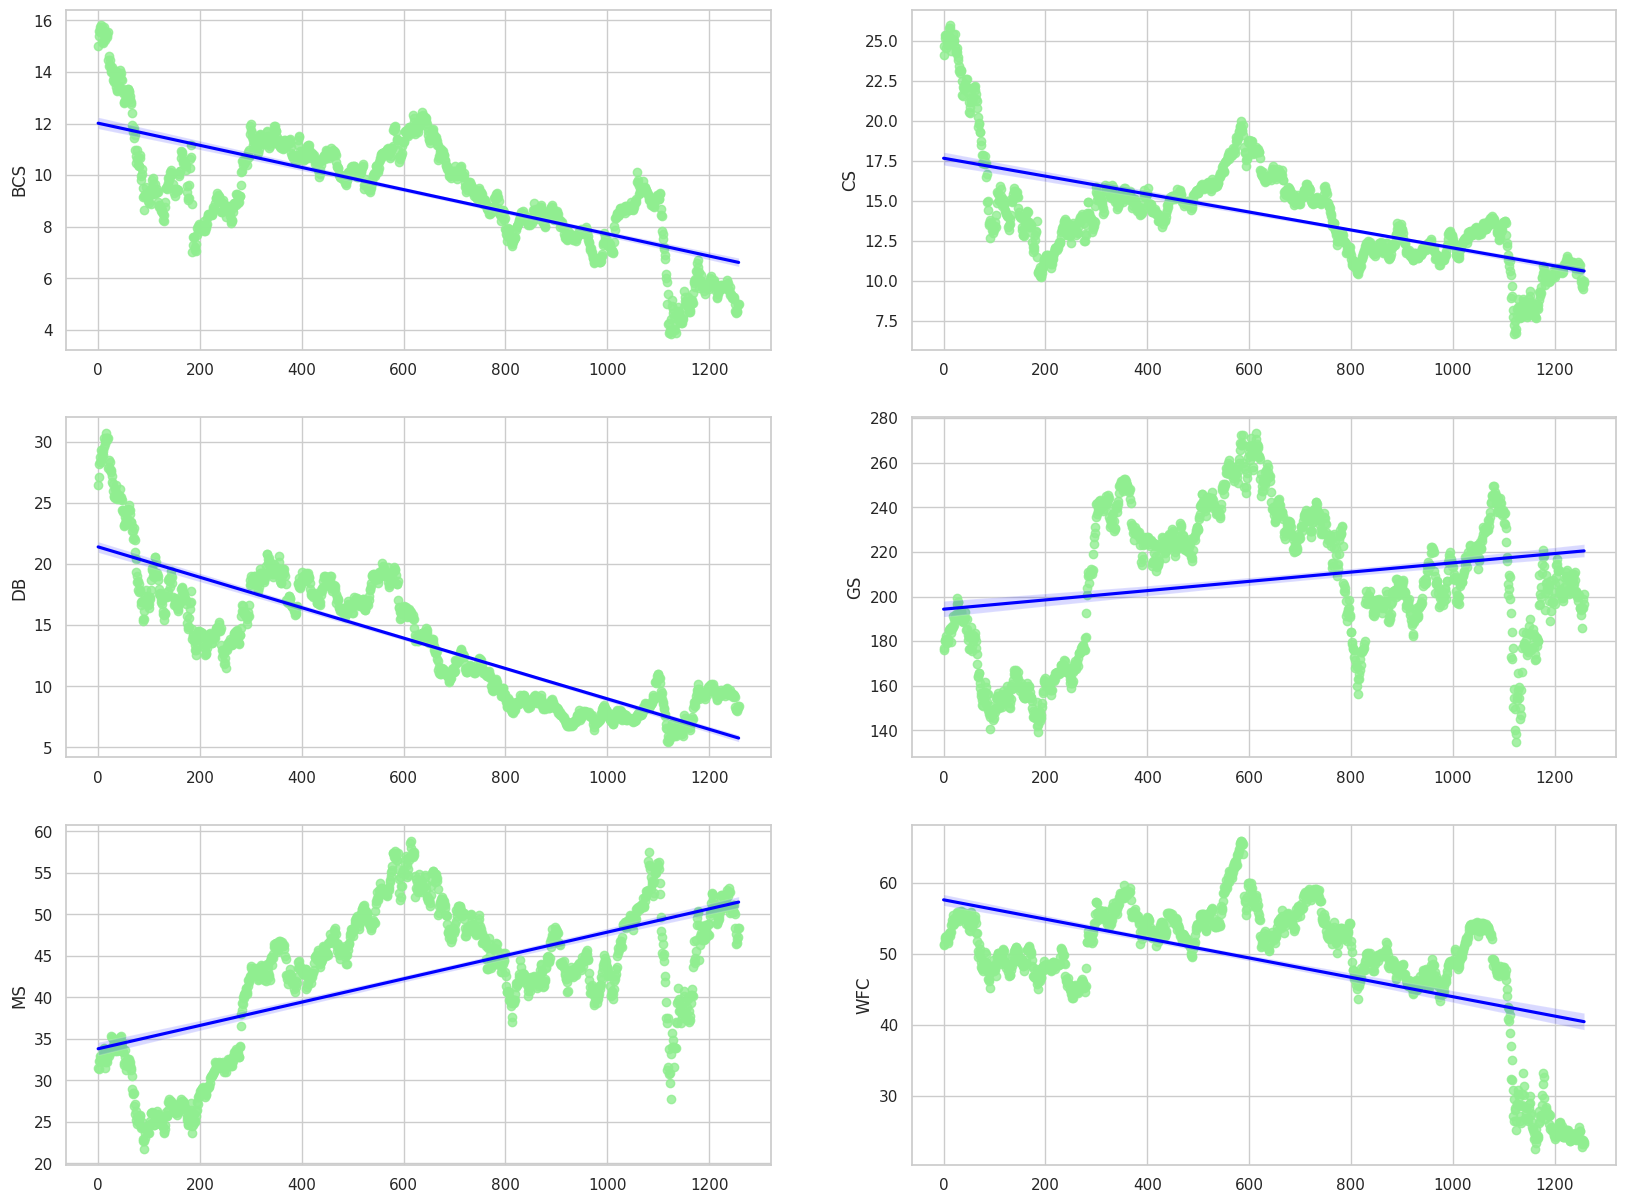

In [77]:
# Creating a Regplot for each stocks in Finance sector.
plt.figure(figsize = (20,15))
sns.set(style = 'whitegrid')
for i in range(1,len(ff)):
    plt.subplot(3,2,i)
    sns.regplot(data = F,x = F.index,y = F[ff[i]],scatter_kws={"color": "lightgreen"}, line_kws={"color": "blue"})
plt.show()

As we look at regplot for Finance sector, it is observed that stocks of *GS* & *MS* are the only profitable companies in this sector.

In [78]:
# Comparing price at the start and end of the five year period
pd.concat([F.iloc[0:1,1:],F.iloc[-1:,1:]],axis = 0)

BCS     CS     DB          GS         MS        WFC
0     15.01  24.09  26.52  176.020004  31.500000  51.439999
1258   5.01   9.97   8.40  200.970001  48.349998  23.510000

In [79]:
pd.concat([F.iloc[0:1,1:],F.iloc[-1:,1:]],axis = 0).diff(axis = 0)

BCS     CS     DB         GS         MS        WFC
0      NaN    NaN    NaN        NaN        NaN        NaN
1258 -10.0 -14.12 -18.12  24.949997  16.849998 -27.929999

The above numbers are supporting our observations on GS and MS from Finance sector.

In [80]:
# Adding prefixe "FIN" to the columns in Finance dataset.
F.columns = [f'FIN_{i}' if i not in ['Date'] else f'{i}' for i in F.columns]
F.head()

Date  FIN_BCS     FIN_CS     FIN_DB      FIN_GS     FIN_MS    FIN_WFC
0  2015/01/10    15.01  24.090000  26.520000  176.020004  31.500000  51.439999
1  2015/02/10    15.39  24.639999  27.139999  177.009995  31.430000  51.259998
2  2015/05/10    15.60  25.160000  28.200001  180.699997  32.290001  52.410000
3  2015/06/10    15.55  25.379999  28.400000  180.320007  32.360001  52.029999
4  2015/07/10    15.73  25.320000  28.790001  182.229996  32.930000  52.189999

In [81]:
# Adding "FIN_GS"and "FIN_MS" columns to STK dataset
STK = pd.concat([STK,F[['FIN_GS','FIN_MS']]],axis = 1)
STK.head()

Date          S&P    AVI_LUV      FIN_GS     FIN_MS
0 2015-01-10  1923.819946  38.410000  176.020004  31.500000
1 2015-02-10  1951.359985  38.380001  177.009995  31.430000
2 2015-05-10  1987.050049  39.299999  180.699997  32.290001
3 2015-06-10  1979.920044  38.000000  180.320007  32.360001
4 2015-07-10  1995.829956  38.709999  182.229996  32.930000

## Visualising Pharma_Healthcare data

In [82]:
# Converting Date column for datetime to string in order to make it workable with plotly.
PH['Date'] = PH['Date'].dt.strftime('%Y/%m/%d')

In [83]:
fig = px.line(PH,x = PH['Date'],y = fph,template='plotly_white')
fig.show()

From the above plot we observe *UNH, JNJ* are doing well in Pharma&Healthcare sector.

**Analysing Pharma_Healthcare Stocks**

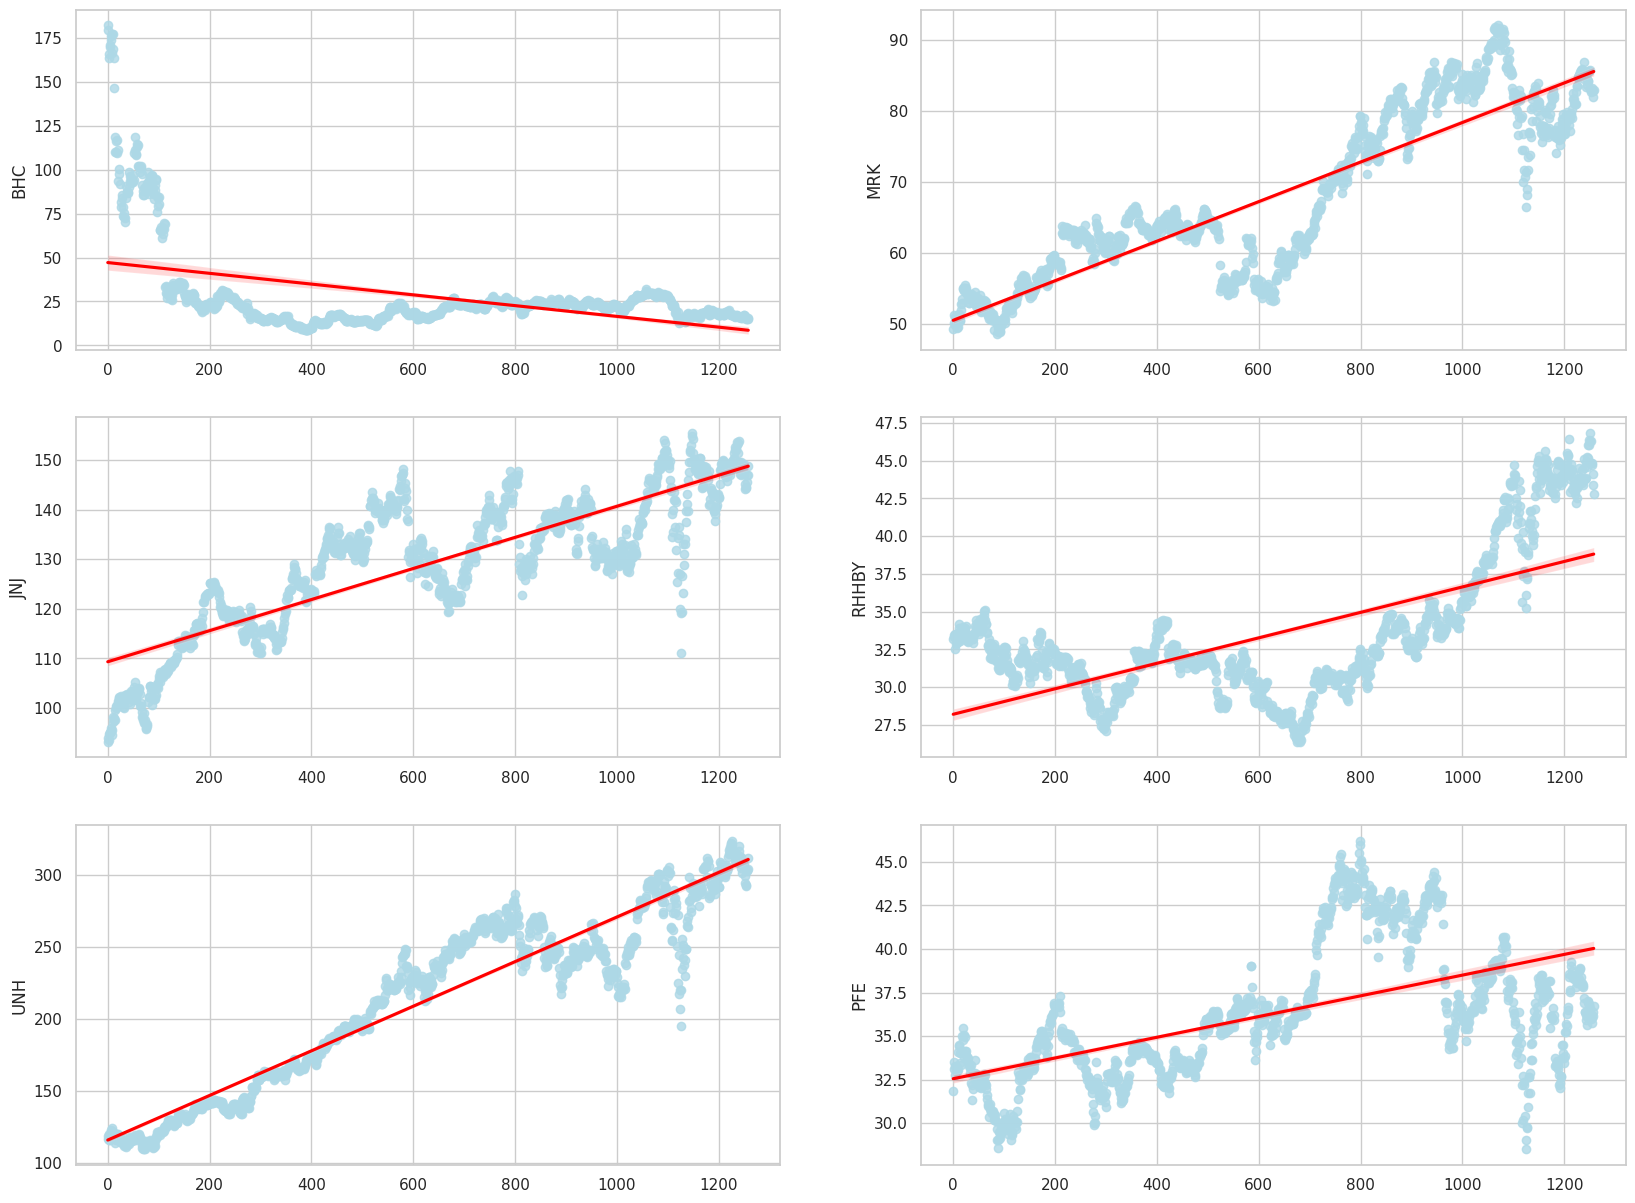

In [84]:
# Plotting Regplot for each data in Pharma sector
plt.figure(figsize = (20,15))
sns.set(style = 'whitegrid')
for i in range(1,len(fph)):
    plt.subplot(3,2,i)
    sns.regplot(data = PH,x = PH.index,y = PH[fph[i]],scatter_kws={"color": "lightblue"}, line_kws={"color": "red"})
plt.show()

From the above regplot we observe not just UNH and JNJ but MRK and RHHBY are also showing upward trend.

In [85]:
# Comparing price at the start and end of the five year period.
pd.concat([PH.iloc[0:1,1:],PH.iloc[-1:,1:]],axis = 0)

BHC        MRK         JNJ      RHHBY         UNH        PFE
0     179.600006  49.369999   93.169998  33.220001  116.610001  31.840000
1258   15.540000  82.949997  148.880005  42.810001  311.769989  36.700001

In [86]:
pd.concat([PH.iloc[0:1,1:],PH.iloc[-1:,1:]],axis = 0).diff(axis = 0)

BHC        MRK        JNJ  RHHBY         UNH       PFE
0            NaN        NaN        NaN    NaN         NaN       NaN
1258 -164.060006  33.579998  55.710007   9.59  195.159988  4.860001

The above numbers support our observation, except __BHC__ rest all other stocks for Pharma&Healthcare sector are profitable. The reason for this sector for being profit making even in the tough times of Pandemic may be the demand of the Medicine and Health care, and the supply from this sector.

In [87]:
# Adding prefixe "PH" to the columns in Pharma&Healthcare dataset.
PH.columns = [f'PH_{i}' if i not in ['Date'] else f'{i}' for i in PH.columns]
PH.head()

Date      PH_BHC     PH_MRK     PH_JNJ   PH_RHHBY      PH_UNH  \
0  2015/01/10  179.600006  49.369999  93.169998  33.220001  116.610001   
1  2015/02/10  182.320007  50.139999  93.930000  33.320000  118.830002   
2  2015/05/10  163.460007  51.230000  94.760002  33.439999  119.650002   
3  2015/06/10  166.000000  49.799999  93.419998  33.529999  116.050003   
4  2015/07/10  169.830002  50.950001  94.980003  32.549999  116.430000   

      PH_PFE  
0  31.840000  
1  33.080002  
2  33.480000  
3  32.790001  
4  33.290001

In [88]:
STK = pd.concat([STK,PH[['PH_JNJ','PH_MRK','PH_RHHBY','PH_UNH']]],axis = 1)
STK.head()

Date          S&P    AVI_LUV      FIN_GS     FIN_MS     PH_JNJ  \
0 2015-01-10  1923.819946  38.410000  176.020004  31.500000  93.169998   
1 2015-02-10  1951.359985  38.380001  177.009995  31.430000  93.930000   
2 2015-05-10  1987.050049  39.299999  180.699997  32.290001  94.760002   
3 2015-06-10  1979.920044  38.000000  180.320007  32.360001  93.419998   
4 2015-07-10  1995.829956  38.709999  182.229996  32.930000  94.980003   

      PH_MRK   PH_RHHBY      PH_UNH  
0  49.369999  33.220001  116.610001  
1  50.139999  33.320000  118.830002  
2  51.230000  33.439999  119.650002  
3  49.799999  33.529999  116.050003  
4  50.950001  32.549999  116.430000

**We're adding the profit making stocks from Pharma&Healthcare to STK dataset.**

## Visualising Technology data

In [89]:
# Converting Date column for datetime to string in order to make it workable with plotly.
T['Date'] = T['Date'].dt.strftime('%Y/%m/%d')

In [90]:
fig = px.line(T,x = T['Date'],y = ft,template='plotly_white')
fig.show()

In Technology sector it looks *AMZN* and *GOOG* are better performers.

**Analysing Technology Stocks**

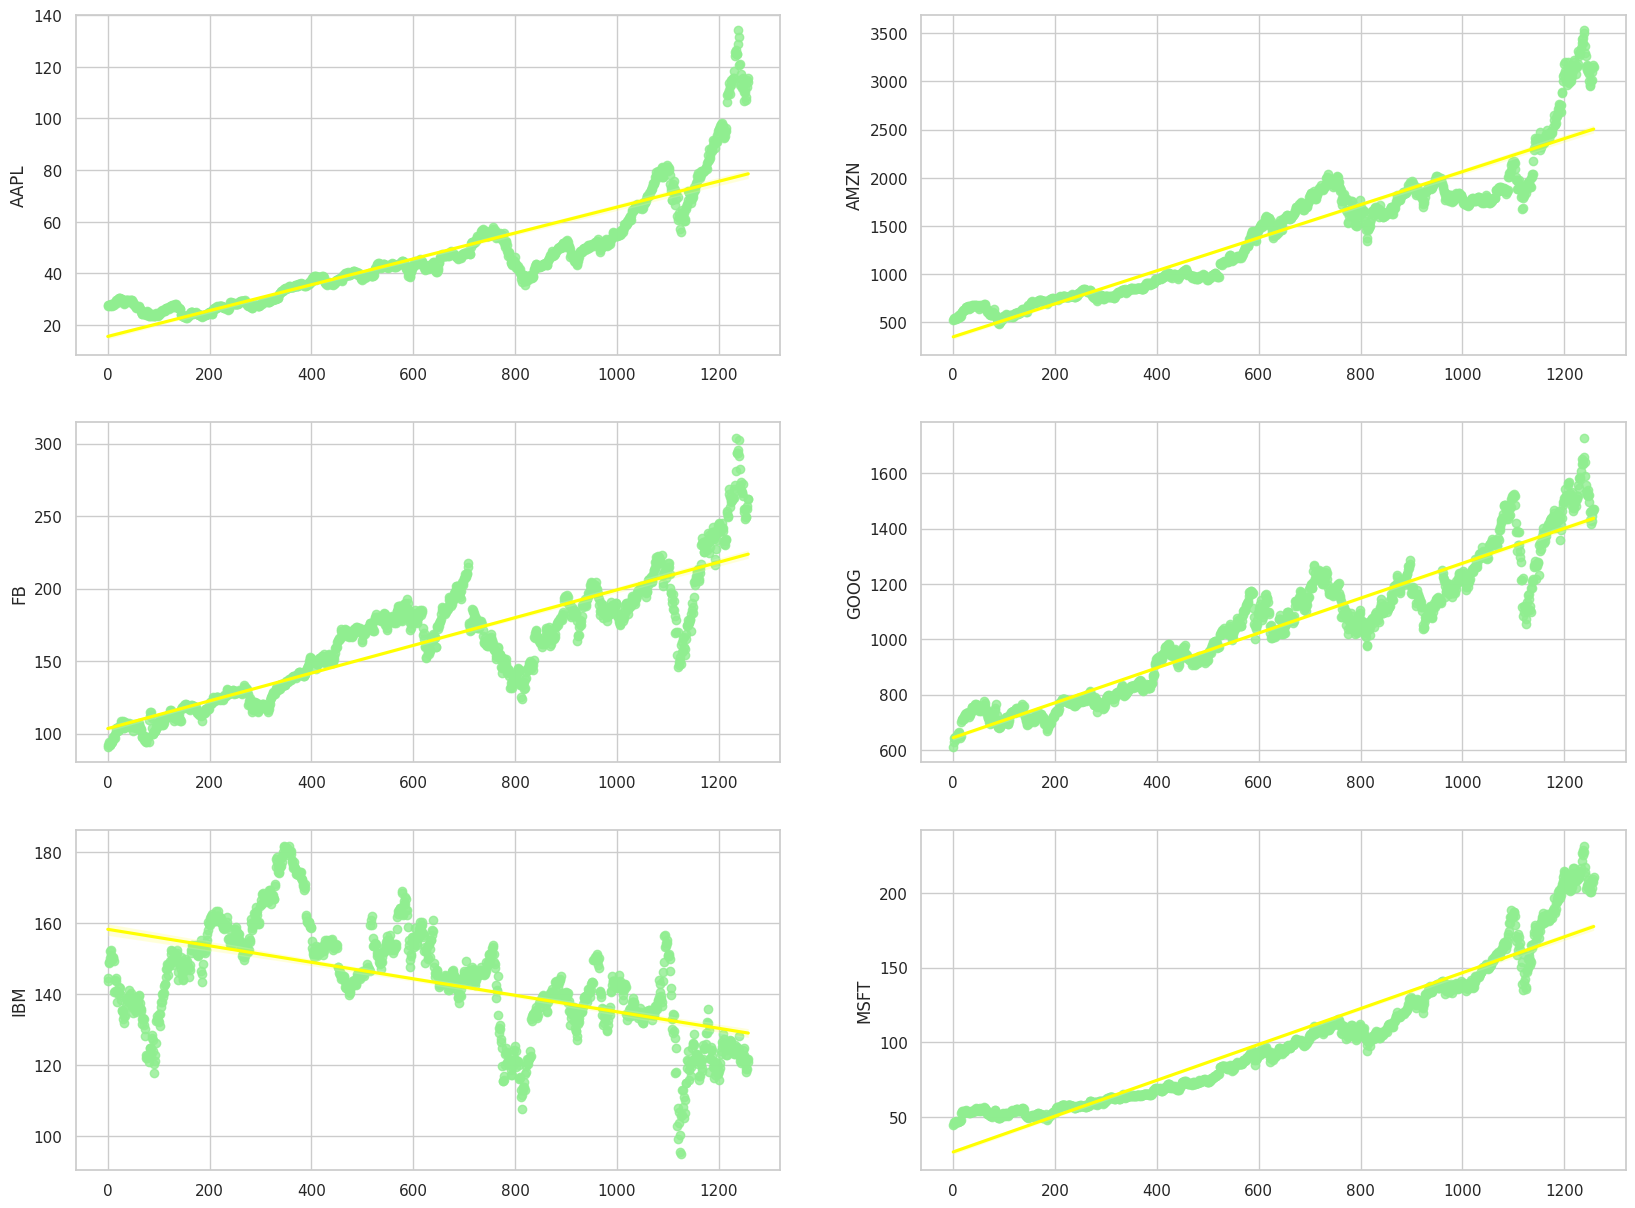

In [91]:
# Creating regplot for IT stocks
plt.figure(figsize = (20,15))
sns.set(style = 'whitegrid')
for i in range(1,len(ft)):
    plt.subplot(3,2,i)
    sns.regplot(data = T,x = T.index,y = T[ft[i]],scatter_kws={"color": "lightgreen"}, line_kws={"color": "yellow"})
plt.show()

Above visuals suggest AMZN,GOOG,FB and MSFT are all profit making stocks, one reason this sector to have such high profit stocks is they facilitated Work from home with their service. As major popualtion was forced stay home, these paltforms allowed people to stay connected with the world, delivery services and social connection on digital basis.

In [92]:
# Comparing price at the start and end of the five year period.
pd.concat([T.iloc[0:1,1:],T.iloc[-1:,1:]],axis = 0)

AAPL         AMZN          FB         GOOG         IBM        MSFT
0      27.395000   520.719971   90.949997   611.289978  143.589996   44.610001
1258  115.809998  3148.729980  261.899994  1469.599976  121.669998  210.330002

In [93]:
pd.concat([T.iloc[0:1,1:],T.iloc[-1:,1:]],axis = 0).diff(axis = 0,periods = 1)

AAPL         AMZN          FB        GOOG        IBM        MSFT
0           NaN          NaN         NaN         NaN        NaN         NaN
1258  88.414998  2628.010009  170.949997  858.309998 -21.919998  165.720001

Only IBM is showing negative returns over 5 years time but rest having given huge profits during same 5 years time.

In [94]:
# Adding prefix "TEC" to the columns in Technology dataset.
T.columns = [f'TEC_{i}' if i not in ["Date"] else f'{i}' for i in T.columns]
T.head()

Date   TEC_AAPL    TEC_AMZN     TEC_FB    TEC_GOOG     TEC_IBM  \
0  2015/01/10  27.395000  520.719971  90.949997  611.289978  143.589996   
1  2015/02/10  27.594999  532.539978  92.070000  626.909973  144.580002   
2  2015/05/10  27.695000  543.679993  94.010002  641.469971  149.039993   
3  2015/06/10  27.827499  537.479980  92.800003  645.440002  148.779999   
4  2015/07/10  27.695000  541.940002  92.400002  642.359985  150.089996   

    TEC_MSFT  
0  44.610001  
1  45.570000  
2  46.630001  
3  46.750000  
4  46.799999

In [95]:
# Adding the four profit making stocks fro IT sector to STK dataset.
STK = pd.concat([STK,T[['TEC_AMZN','TEC_FB','TEC_GOOG','TEC_MSFT']]],axis = 1)
STK.head()

Date          S&P    AVI_LUV      FIN_GS     FIN_MS     PH_JNJ  \
0 2015-01-10  1923.819946  38.410000  176.020004  31.500000  93.169998   
1 2015-02-10  1951.359985  38.380001  177.009995  31.430000  93.930000   
2 2015-05-10  1987.050049  39.299999  180.699997  32.290001  94.760002   
3 2015-06-10  1979.920044  38.000000  180.320007  32.360001  93.419998   
4 2015-07-10  1995.829956  38.709999  182.229996  32.930000  94.980003   

      PH_MRK   PH_RHHBY      PH_UNH    TEC_AMZN     TEC_FB    TEC_GOOG  \
0  49.369999  33.220001  116.610001  520.719971  90.949997  611.289978   
1  50.139999  33.320000  118.830002  532.539978  92.070000  626.909973   
2  51.230000  33.439999  119.650002  543.679993  94.010002  641.469971   
3  49.799999  33.529999  116.050003  537.479980  92.800003  645.440002   
4  50.950001  32.549999  116.430000  541.940002  92.400002  642.359985   

    TEC_MSFT  
0  44.610001  
1  45.570000  
2  46.630001  
3  46.750000  
4  46.799999

Now that we have shortlisted stocks from each sectors, let's analyze them further. As we've selected the better performers from their resp. sector, it will be interesting t check and compare them all.

In [96]:
STK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1259 non-null   datetime64[ns]
 1   S&P       1259 non-null   float64       
 2   AVI_LUV   1259 non-null   float64       
 3   FIN_GS    1259 non-null   float64       
 4   FIN_MS    1259 non-null   float64       
 5   PH_JNJ    1259 non-null   float64       
 6   PH_MRK    1259 non-null   float64       
 7   PH_RHHBY  1259 non-null   float64       
 8   PH_UNH    1259 non-null   float64       
 9   TEC_AMZN  1259 non-null   float64       
 10  TEC_FB    1259 non-null   float64       
 11  TEC_GOOG  1259 non-null   float64       
 12  TEC_MSFT  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 128.0 KB


In [97]:
STK.describe()

S&P      AVI_LUV       FIN_GS       FIN_MS       PH_JNJ  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean   2608.429927    49.521064   207.440238    42.654146   129.051017   
std     394.738078     8.832897    31.598709     8.660317    13.654721   
min    1829.079956    23.870001   134.970001    21.690001    93.169998   
25%    2264.484986    42.415001   183.175003    38.225001   119.640004   
50%    2656.300049    51.880001   209.660004    44.020000   130.979996   
75%    2888.265014    55.935000   231.669998    48.945000   139.495002   
max    3580.840088    66.290001   273.380005    58.910000   155.509995   

            PH_MRK     PH_RHHBY       PH_UNH     TEC_AMZN       TEC_FB  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     68.029103    33.511231   213.125179  1426.990628   163.611136   
std      11.550949     4.664290    59.429501   668.360391    40.045767   
min      48.590000    26.389999   109.230003   482.070007    90.949997   
25%      58.660000    30.629999   160.570007   818.119995   129.150002   
50%      64.089996    32.040001   226.639999  1500.000000   167.240005   
75%      79.380001    34.470001   259.750000  1828.789978   186.894996   
max      92.040001    46.840000   323.700012  3531.449951   303.910004   

          TEC_GOOG     TEC_MSFT  
count  1259.000000  1259.000000  
mean   1040.788454   102.185083  
std     241.600739    45.758418  
min     611.289978    44.610001  
25%     797.459992    62.659999  
50%    1055.810059    93.919998  
75%    1196.440002   135.220001  
max    1728.280029   231.649994

In [98]:
STK.set_index('Date',drop = True,inplace = True)
STK.head()

S&P    AVI_LUV      FIN_GS     FIN_MS     PH_JNJ  \
Date                                                                   
2015-01-10  1923.819946  38.410000  176.020004  31.500000  93.169998   
2015-02-10  1951.359985  38.380001  177.009995  31.430000  93.930000   
2015-05-10  1987.050049  39.299999  180.699997  32.290001  94.760002   
2015-06-10  1979.920044  38.000000  180.320007  32.360001  93.419998   
2015-07-10  1995.829956  38.709999  182.229996  32.930000  94.980003   

               PH_MRK   PH_RHHBY      PH_UNH    TEC_AMZN     TEC_FB  \
Date                                                                  
2015-01-10  49.369999  33.220001  116.610001  520.719971  90.949997   
2015-02-10  50.139999  33.320000  118.830002  532.539978  92.070000   
2015-05-10  51.230000  33.439999  119.650002  543.679993  94.010002   
2015-06-10  49.799999  33.529999  116.050003  537.479980  92.800003   
2015-07-10  50.950001  32.549999  116.430000  541.940002  92.400002   

              TEC_GOOG   TEC_MSFT  
Date                               
2015-01-10  611.289978  44.610001  
2015-02-10  626.909973  45.570000  
2015-05-10  641.469971  46.630001  
2015-06-10  645.440002  46.750000  
2015-07-10  642.359985  46.799999

The selected stocks belond to as follows:
1. AVI_LUV - Southwest
2. FIN_GS - Goldman Sachs
3. FIN_MS - Morgan Stanley
4. PH_JNJ - Johnson & Johnson
5. PH_MRK - MRK Healthcare
6. PH_RHHBY  - Roche Holding AG
7. PH_UNH - United Healthcare
8. TEC_AMZN - Amazon
9. TEC_FB - Facebook(META)
10.TEC_GOOG - Google
11.TEC_MSFT - Microsoft

**Exporting Clean data set with only better performing Stocks.**

In [99]:
STK.to_csv('Stock_Analysis.csv')

In [100]:
STK.index = STK.index.strftime('%Y/%m/%d')
STK.head()

S&P    AVI_LUV      FIN_GS     FIN_MS     PH_JNJ  \
Date                                                                   
2015/01/10  1923.819946  38.410000  176.020004  31.500000  93.169998   
2015/02/10  1951.359985  38.380001  177.009995  31.430000  93.930000   
2015/05/10  1987.050049  39.299999  180.699997  32.290001  94.760002   
2015/06/10  1979.920044  38.000000  180.320007  32.360001  93.419998   
2015/07/10  1995.829956  38.709999  182.229996  32.930000  94.980003   

               PH_MRK   PH_RHHBY      PH_UNH    TEC_AMZN     TEC_FB  \
Date                                                                  
2015/01/10  49.369999  33.220001  116.610001  520.719971  90.949997   
2015/02/10  50.139999  33.320000  118.830002  532.539978  92.070000   
2015/05/10  51.230000  33.439999  119.650002  543.679993  94.010002   
2015/06/10  49.799999  33.529999  116.050003  537.479980  92.800003   
2015/07/10  50.950001  32.549999  116.430000  541.940002  92.400002   

              TEC_GOOG   TEC_MSFT  
Date                               
2015/01/10  611.289978  44.610001  
2015/02/10  626.909973  45.570000  
2015/05/10  641.469971  46.630001  
2015/06/10  645.440002  46.750000  
2015/07/10  642.359985  46.799999

In [101]:
col = STK.columns.tolist()
col

['S&P',
 'AVI_LUV',
 'FIN_GS',
 'FIN_MS',
 'PH_JNJ',
 'PH_MRK',
 'PH_RHHBY',
 'PH_UNH',
 'TEC_AMZN',
 'TEC_FB',
 'TEC_GOOG',
 'TEC_MSFT']

In [102]:
fig = px.line(STK,x = STK.index,y = col,height = 700,template = 'plotly_white')
fig.update_layout(legend_title = 'STOCKS',title = 'Stocks Prices',title_x = 0.5)
fig.show()

The Stock prices for each shortlisted stocks shows a sharp dip around the month of March in 2020, that was the time when the Corona Pandemic affected the Market.

**Normalized Stock Prices**

In [103]:
STK_N = STK.div(STK.iloc[0])
STK_N.head(10)

S&P   AVI_LUV    FIN_GS    FIN_MS    PH_JNJ    PH_MRK  \
Date                                                                     
2015/01/10  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015/02/10  1.014315  0.999219  1.005624  0.997778  1.008157  1.015597   
2015/05/10  1.032867  1.023171  1.026588  1.025079  1.017066  1.037675   
2015/06/10  1.029161  0.989326  1.024429  1.027302  1.002683  1.008710   
2015/07/10  1.037431  1.007810  1.035280  1.045397  1.019427  1.032003   
2015/08/10  1.046579  1.009112  1.028690  1.047302  1.020500  1.033421   
2015/09/10  1.047338  1.039833  1.018009  1.038730  1.023613  1.032003   
2015/12/10  1.048674  1.073158  1.023918  1.041270  1.030267  1.027142   
2015/10/13  1.041516  1.062744  1.028122  1.035238  1.024471  1.002026   
2015/10/14  1.036604  1.063265  1.019827  1.033016  1.014597  1.003443   

            PH_RHHBY    PH_UNH  TEC_AMZN    TEC_FB  TEC_GOOG  TEC_MSFT  
Date                                                                    
2015/01/10  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
2015/02/10  1.003010  1.019038  1.022699  1.012314  1.025553  1.021520  
2015/05/10  1.006622  1.026070  1.044093  1.033645  1.049371  1.045281  
2015/06/10  1.009332  0.995198  1.032186  1.020341  1.055866  1.047971  
2015/07/10  0.979831  0.998456  1.040751  1.015943  1.050827  1.049092  
2015/08/10  1.000903  0.995455  1.023890  1.016713  1.045592  1.063663  
2015/09/10  0.989163  1.022811  1.036642  1.025179  1.052872  1.056041  
2015/12/10  0.993377  1.050596  1.056595  1.036394  1.057878  1.053575  
2015/10/13  0.998796  1.063288  1.054117  1.034854  1.067088  1.051110  
2015/10/14  0.993980  1.046823  1.046301  1.034305  1.065223  1.046402

In [104]:
fig = px.line(STK_N,x = STK_N.index,y = col,height = 700,template = 'plotly_white')
fig.update_layout(legend_title = 'STOCKS',title = 'Normalized Stocks Prices',title_x = 0.5)
fig.show()

When we Normlize the Stock prices, the time series data lies in a prescribed normal, standard range. And hence we see that few stocks shows higher profit than the S&P500, which was thought of beating every other stock if plotted with regular close price.

In [105]:
STK.describe().T.loc[:,['min','max']]

min          max
S&P       1829.079956  3580.840088
AVI_LUV     23.870001    66.290001
FIN_GS     134.970001   273.380005
FIN_MS      21.690001    58.910000
PH_JNJ      93.169998   155.509995
PH_MRK      48.590000    92.040001
PH_RHHBY    26.389999    46.840000
PH_UNH     109.230003   323.700012
TEC_AMZN   482.070007  3531.449951
TEC_FB      90.949997   303.910004
TEC_GOOG   611.289978  1728.280029
TEC_MSFT    44.610001   231.649994

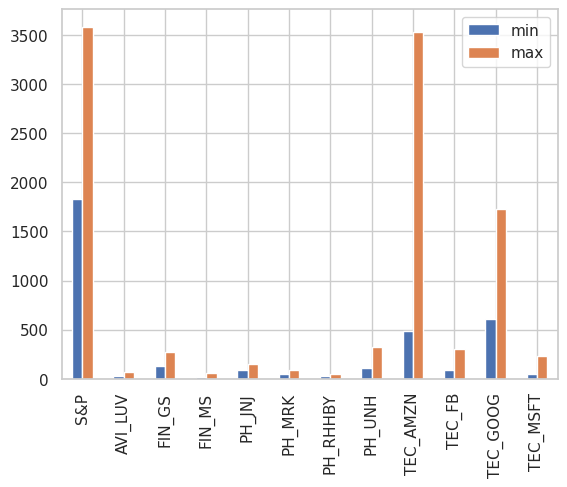

In [106]:
STK.describe().T.loc[:,['min','max']].plot.bar()
plt.show()

**Relative Strenght**

In [107]:
RS = pd.DataFrame(index = STK.index)
RS[col] = STK[col].div(STK['S&P'],axis = 0)
RS.head()

S&P   AVI_LUV    FIN_GS    FIN_MS    PH_JNJ    PH_MRK  PH_RHHBY  \
Date                                                                          
2015/01/10  1.0  0.019965  0.091495  0.016374  0.048430  0.025662  0.017268   
2015/02/10  1.0  0.019668  0.090711  0.016107  0.048136  0.025695  0.017075   
2015/05/10  1.0  0.019778  0.090939  0.016250  0.047689  0.025782  0.016829   
2015/06/10  1.0  0.019193  0.091074  0.016344  0.047184  0.025153  0.016935   
2015/07/10  1.0  0.019395  0.091305  0.016499  0.047589  0.025528  0.016309   

              PH_UNH  TEC_AMZN    TEC_FB  TEC_GOOG  TEC_MSFT  
Date                                                          
2015/01/10  0.060614  0.270670  0.047276  0.317748  0.023188  
2015/02/10  0.060896  0.272907  0.047182  0.321268  0.023353  
2015/05/10  0.060215  0.273612  0.047311  0.322825  0.023467  
2015/06/10  0.058613  0.271465  0.046871  0.325993  0.023612  
2015/07/10  0.058337  0.271536  0.046297  0.321851  0.023449

In [108]:
fig = px.line(RS,x = RS.index,y = col,template = 'plotly_white')
fig.update_layout(title = 'Relative Strenght of Stocks',title_x = 0.5,legend_title = 'STOCKS')
fig.show()

**Daily Returns**

In [109]:
DR = pd.DataFrame(index = STK.index)
for i in range(len(col)):
    DR[col[i]] = STK[col[i]].pct_change()
DR.head()

S&P   AVI_LUV    FIN_GS    FIN_MS    PH_JNJ    PH_MRK  \
Date                                                                     
2015/01/10       NaN       NaN       NaN       NaN       NaN       NaN   
2015/02/10  0.014315 -0.000781  0.005624 -0.002222  0.008157  0.015597   
2015/05/10  0.018290  0.023971  0.020846  0.027362  0.008836  0.021739   
2015/06/10 -0.003588 -0.033079 -0.002103  0.002168 -0.014141 -0.027913   
2015/07/10  0.008036  0.018684  0.010592  0.017614  0.016699  0.023092   

            PH_RHHBY    PH_UNH  TEC_AMZN    TEC_FB  TEC_GOOG  TEC_MSFT  
Date                                                                    
2015/01/10       NaN       NaN       NaN       NaN       NaN       NaN  
2015/02/10  0.003010  0.019038  0.022699  0.012314  0.025553  0.021520  
2015/05/10  0.003601  0.006901  0.020919  0.021071  0.023225  0.023261  
2015/06/10  0.002691 -0.030088 -0.011404 -0.012871  0.006189  0.002573  
2015/07/10 -0.029228  0.003274  0.008298 -0.004310 -0.004772  0.001069

In [110]:
fig = px.line(DR,x = DR.index,y = col,height = 700,template = 'plotly_white')
fig.update_layout(legend_title = 'STOCKS',title = 'Daily Returns',title_x = 0.5)
fig.show()

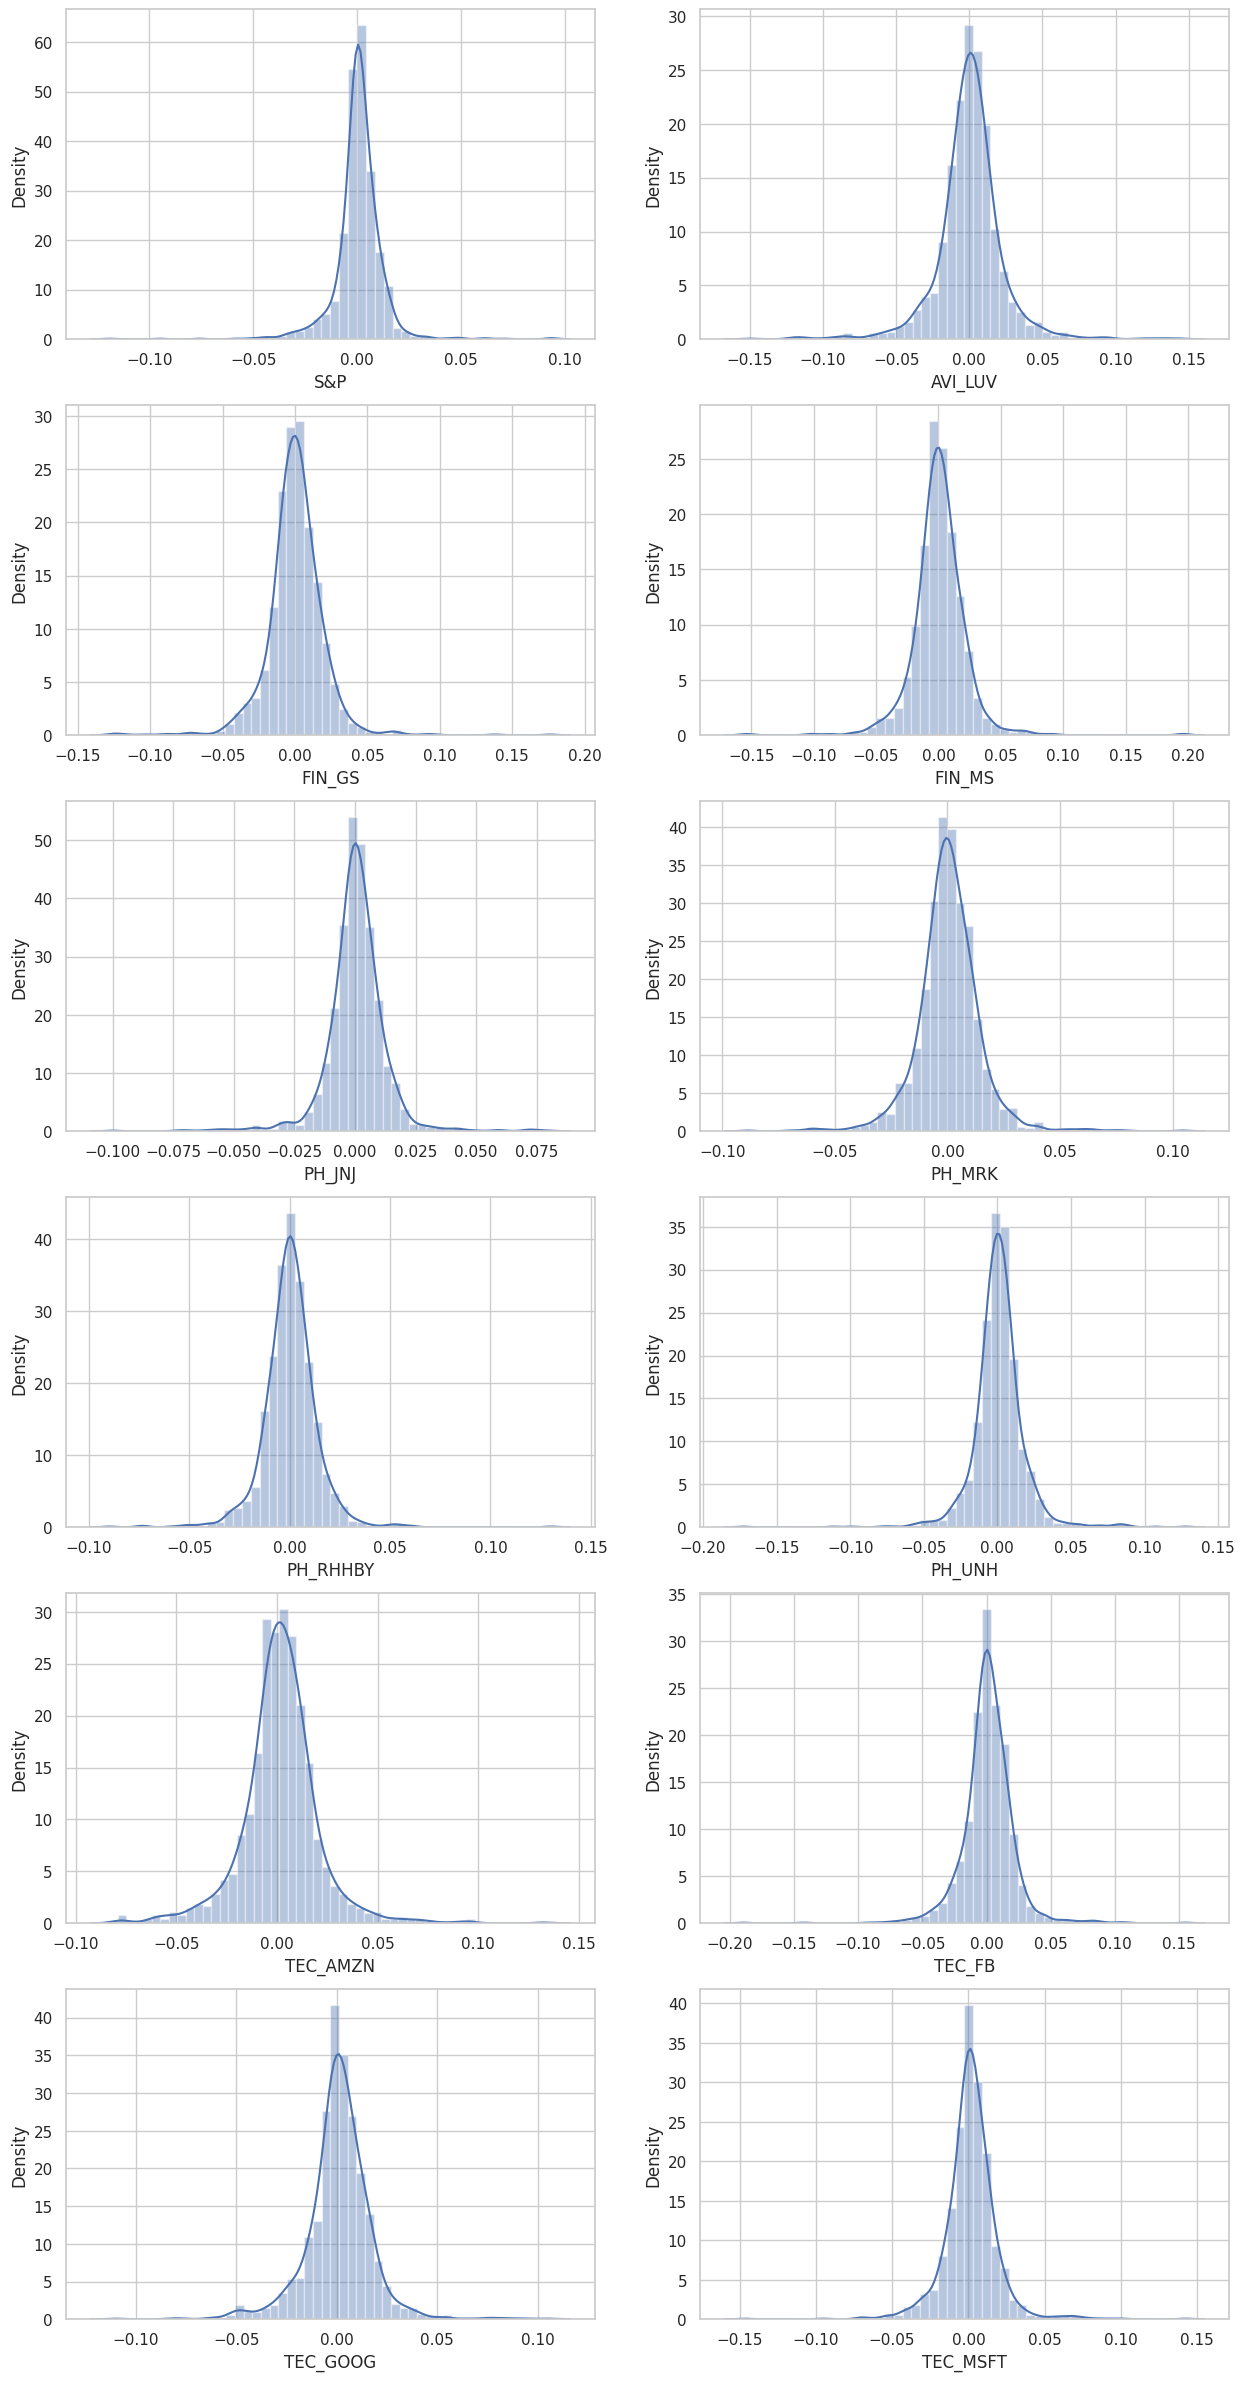

In [111]:
plt.figure(figsize = (15,30))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.distplot(DR[col[i]])
plt.show()

The above histogram plot for different stocks explains their variation in the market, how much they've been on profit/loss side.

**Risk Matrix**: It contains various calculation of different stocks, which will help us to compare and evaluate the performance against each other.

In [112]:
RM = DR.describe().transpose().loc[:,['mean','std','min','max']]
RM = 100*RM # Values in percentage
RM

mean       std        min        max
S&P       0.051749  1.208006 -11.984055   9.382774
AVI_LUV   0.024460  2.291330 -15.109442  14.444134
FIN_GS    0.030334  1.989900 -12.705308  17.580307
FIN_MS    0.057752  2.180951 -15.600000  19.770045
PH_JNJ    0.045050  1.245905 -10.037876   7.997719
PH_MRK    0.051124  1.406695  -8.899025  10.408024
PH_RHHBY  0.029271  1.351412  -8.960935  13.011775
PH_UNH    0.094126  1.781039 -17.276876  12.798934
TEC_AMZN  0.161053  1.896856  -7.922081  13.216371
TEC_FB    0.104970  2.035420 -18.960922  15.521445
TEC_GOOG  0.083410  1.652039 -11.100820  10.448543
TEC_MSFT  0.138704  1.753947 -14.739031  14.216888

In [113]:
RM.rename(columns = {'mean':'Avg_Rets','std':'Avg_Risk','min':'Min','max':'Max'},inplace = True)
RM

Avg_Rets  Avg_Risk        Min        Max
S&P       0.051749  1.208006 -11.984055   9.382774
AVI_LUV   0.024460  2.291330 -15.109442  14.444134
FIN_GS    0.030334  1.989900 -12.705308  17.580307
FIN_MS    0.057752  2.180951 -15.600000  19.770045
PH_JNJ    0.045050  1.245905 -10.037876   7.997719
PH_MRK    0.051124  1.406695  -8.899025  10.408024
PH_RHHBY  0.029271  1.351412  -8.960935  13.011775
PH_UNH    0.094126  1.781039 -17.276876  12.798934
TEC_AMZN  0.161053  1.896856  -7.922081  13.216371
TEC_FB    0.104970  2.035420 -18.960922  15.521445
TEC_GOOG  0.083410  1.652039 -11.100820  10.448543
TEC_MSFT  0.138704  1.753947 -14.739031  14.216888

In [114]:
RM['Anul_Rets'] = RM['Avg_Rets']*252 # Calculating Annual Returns
RM

Avg_Rets  Avg_Risk        Min        Max  Anul_Rets
S&P       0.051749  1.208006 -11.984055   9.382774  13.040656
AVI_LUV   0.024460  2.291330 -15.109442  14.444134   6.163837
FIN_GS    0.030334  1.989900 -12.705308  17.580307   7.644200
FIN_MS    0.057752  2.180951 -15.600000  19.770045  14.553615
PH_JNJ    0.045050  1.245905 -10.037876   7.997719  11.352656
PH_MRK    0.051124  1.406695  -8.899025  10.408024  12.883185
PH_RHHBY  0.029271  1.351412  -8.960935  13.011775   7.376346
PH_UNH    0.094126  1.781039 -17.276876  12.798934  23.719727
TEC_AMZN  0.161053  1.896856  -7.922081  13.216371  40.585455
TEC_FB    0.104970  2.035420 -18.960922  15.521445  26.452355
TEC_GOOG  0.083410  1.652039 -11.100820  10.448543  21.019428
TEC_MSFT  0.138704  1.753947 -14.739031  14.216888  34.953498

In [115]:
import math
RM['Anul_Risk'] = RM['Avg_Risk']*math.sqrt(252) # Calculating Annual Risk
RM

Avg_Rets  Avg_Risk        Min        Max  Anul_Rets  Anul_Risk
S&P       0.051749  1.208006 -11.984055   9.382774  13.040656  19.176501
AVI_LUV   0.024460  2.291330 -15.109442  14.444134   6.163837  36.373735
FIN_GS    0.030334  1.989900 -12.705308  17.580307   7.644200  31.588685
FIN_MS    0.057752  2.180951 -15.600000  19.770045  14.553615  34.621529
PH_JNJ    0.045050  1.245905 -10.037876   7.997719  11.352656  19.778133
PH_MRK    0.051124  1.406695  -8.899025  10.408024  12.883185  22.330584
PH_RHHBY  0.029271  1.351412  -8.960935  13.011775   7.376346  21.452996
PH_UNH    0.094126  1.781039 -17.276876  12.798934  23.719727  28.273114
TEC_AMZN  0.161053  1.896856  -7.922081  13.216371  40.585455  30.111660
TEC_FB    0.104970  2.035420 -18.960922  15.521445  26.452355  32.311293
TEC_GOOG  0.083410  1.652039 -11.100820  10.448543  21.019428  26.225301
TEC_MSFT  0.138704  1.753947 -14.739031  14.216888  34.953498  27.843048

**CAGR**:The compound annual growth rate (CAGR) is the rate of return (RoR) that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each period of the investment’s life span.
- A negative CAGR would indicate losses over time rather than gains.

In [116]:
RM['CAGR'] = (((STK.iloc[-1]/STK.iloc[0])**(1/5))-1)*100
RM

Avg_Rets  Avg_Risk        Min        Max  Anul_Rets  Anul_Risk  \
S&P       0.051749  1.208006 -11.984055   9.382774  13.040656  19.176501   
AVI_LUV   0.024460  2.291330 -15.109442  14.444134   6.163837  36.373735   
FIN_GS    0.030334  1.989900 -12.705308  17.580307   7.644200  31.588685   
FIN_MS    0.057752  2.180951 -15.600000  19.770045  14.553615  34.621529   
PH_JNJ    0.045050  1.245905 -10.037876   7.997719  11.352656  19.778133   
PH_MRK    0.051124  1.406695  -8.899025  10.408024  12.883185  22.330584   
PH_RHHBY  0.029271  1.351412  -8.960935  13.011775   7.376346  21.452996   
PH_UNH    0.094126  1.781039 -17.276876  12.798934  23.719727  28.273114   
TEC_AMZN  0.161053  1.896856  -7.922081  13.216371  40.585455  30.111660   
TEC_FB    0.104970  2.035420 -18.960922  15.521445  26.452355  32.311293   
TEC_GOOG  0.083410  1.652039 -11.100820  10.448543  21.019428  26.225301   
TEC_MSFT  0.138704  1.753947 -14.739031  14.216888  34.953498  27.843048   

               CAGR  
S&P       11.818198  
AVI_LUV   -0.478390  
FIN_GS     2.686616  
FIN_MS     8.947478  
PH_JNJ     9.827743  
PH_MRK    10.935527  
PH_RHHBY   5.203241  
PH_UNH    21.736189  
TEC_AMZN  43.319814  
TEC_FB    23.556774  
TEC_GOOG  19.176430  
TEC_MSFT  36.362137

**Cummulative Returns**:The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one.

In [117]:
RM['Cumm_Rets'] = ((STK.iloc[-1]/STK.iloc[0])-1)
RM

Avg_Rets  Avg_Risk        Min        Max  Anul_Rets  Anul_Risk  \
S&P       0.051749  1.208006 -11.984055   9.382774  13.040656  19.176501   
AVI_LUV   0.024460  2.291330 -15.109442  14.444134   6.163837  36.373735   
FIN_GS    0.030334  1.989900 -12.705308  17.580307   7.644200  31.588685   
FIN_MS    0.057752  2.180951 -15.600000  19.770045  14.553615  34.621529   
PH_JNJ    0.045050  1.245905 -10.037876   7.997719  11.352656  19.778133   
PH_MRK    0.051124  1.406695  -8.899025  10.408024  12.883185  22.330584   
PH_RHHBY  0.029271  1.351412  -8.960935  13.011775   7.376346  21.452996   
PH_UNH    0.094126  1.781039 -17.276876  12.798934  23.719727  28.273114   
TEC_AMZN  0.161053  1.896856  -7.922081  13.216371  40.585455  30.111660   
TEC_FB    0.104970  2.035420 -18.960922  15.521445  26.452355  32.311293   
TEC_GOOG  0.083410  1.652039 -11.100820  10.448543  21.019428  26.225301   
TEC_MSFT  0.138704  1.753947 -14.739031  14.216888  34.953498  27.843048   

               CAGR  Cumm_Rets  
S&P       11.818198   0.748085  
AVI_LUV   -0.478390  -0.023692  
FIN_GS     2.686616   0.141745  
FIN_MS     8.947478   0.534921  
PH_JNJ     9.827743   0.597939  
PH_MRK    10.935527   0.680170  
PH_RHHBY   5.203241   0.288682  
PH_UNH    21.736189   1.673613  
TEC_AMZN  43.319814   5.046878  
TEC_FB    23.556774   1.879604  
TEC_GOOG  19.176430   1.404096  
TEC_MSFT  36.362137   3.714862

**Sharpe Ratio**:The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

**sharpe_ratio** = (return on portfolio - risk free returns)/std.deviation of the portfolio
- here we have been advised to take __0.75__ as risk-free return

In [118]:
RM['Sharpe_Ratio'] = (RM['Anul_Rets']-0.75)/RM['Anul_Risk']
RM

Avg_Rets  Avg_Risk        Min        Max  Anul_Rets  Anul_Risk  \
S&P       0.051749  1.208006 -11.984055   9.382774  13.040656  19.176501   
AVI_LUV   0.024460  2.291330 -15.109442  14.444134   6.163837  36.373735   
FIN_GS    0.030334  1.989900 -12.705308  17.580307   7.644200  31.588685   
FIN_MS    0.057752  2.180951 -15.600000  19.770045  14.553615  34.621529   
PH_JNJ    0.045050  1.245905 -10.037876   7.997719  11.352656  19.778133   
PH_MRK    0.051124  1.406695  -8.899025  10.408024  12.883185  22.330584   
PH_RHHBY  0.029271  1.351412  -8.960935  13.011775   7.376346  21.452996   
PH_UNH    0.094126  1.781039 -17.276876  12.798934  23.719727  28.273114   
TEC_AMZN  0.161053  1.896856  -7.922081  13.216371  40.585455  30.111660   
TEC_FB    0.104970  2.035420 -18.960922  15.521445  26.452355  32.311293   
TEC_GOOG  0.083410  1.652039 -11.100820  10.448543  21.019428  26.225301   
TEC_MSFT  0.138704  1.753947 -14.739031  14.216888  34.953498  27.843048   

               CAGR  Cumm_Rets  Sharpe_Ratio  
S&P       11.818198   0.748085      0.640923  
AVI_LUV   -0.478390  -0.023692      0.148839  
FIN_GS     2.686616   0.141745      0.218249  
FIN_MS     8.947478   0.534921      0.398700  
PH_JNJ     9.827743   0.597939      0.536080  
PH_MRK    10.935527   0.680170      0.543344  
PH_RHHBY   5.203241   0.288682      0.308877  
PH_UNH    21.736189   1.673613      0.812423  
TEC_AMZN  43.319814   5.046878      1.322925  
TEC_FB    23.556774   1.879604      0.795460  
TEC_GOOG  19.176430   1.404096      0.772896  
TEC_MSFT  36.362137   3.714862      1.228439

In [119]:
RM = RM.round(3) # rounding off to 3 decimal places
RM

Avg_Rets  Avg_Risk     Min     Max  Anul_Rets  Anul_Risk    CAGR  \
S&P          0.052     1.208 -11.984   9.383     13.041     19.177  11.818   
AVI_LUV      0.024     2.291 -15.109  14.444      6.164     36.374  -0.478   
FIN_GS       0.030     1.990 -12.705  17.580      7.644     31.589   2.687   
FIN_MS       0.058     2.181 -15.600  19.770     14.554     34.622   8.947   
PH_JNJ       0.045     1.246 -10.038   7.998     11.353     19.778   9.828   
PH_MRK       0.051     1.407  -8.899  10.408     12.883     22.331  10.936   
PH_RHHBY     0.029     1.351  -8.961  13.012      7.376     21.453   5.203   
PH_UNH       0.094     1.781 -17.277  12.799     23.720     28.273  21.736   
TEC_AMZN     0.161     1.897  -7.922  13.216     40.585     30.112  43.320   
TEC_FB       0.105     2.035 -18.961  15.521     26.452     32.311  23.557   
TEC_GOOG     0.083     1.652 -11.101  10.449     21.019     26.225  19.176   
TEC_MSFT     0.139     1.754 -14.739  14.217     34.953     27.843  36.362   

          Cumm_Rets  Sharpe_Ratio  
S&P           0.748         0.641  
AVI_LUV      -0.024         0.149  
FIN_GS        0.142         0.218  
FIN_MS        0.535         0.399  
PH_JNJ        0.598         0.536  
PH_MRK        0.680         0.543  
PH_RHHBY      0.289         0.309  
PH_UNH        1.674         0.812  
TEC_AMZN      5.047         1.323  
TEC_FB        1.880         0.795  
TEC_GOOG      1.404         0.773  
TEC_MSFT      3.715         1.228

**Note that *'Cumm_Rets' and 'Sharpe_Ratio'* are ratio rest others are in percentage**

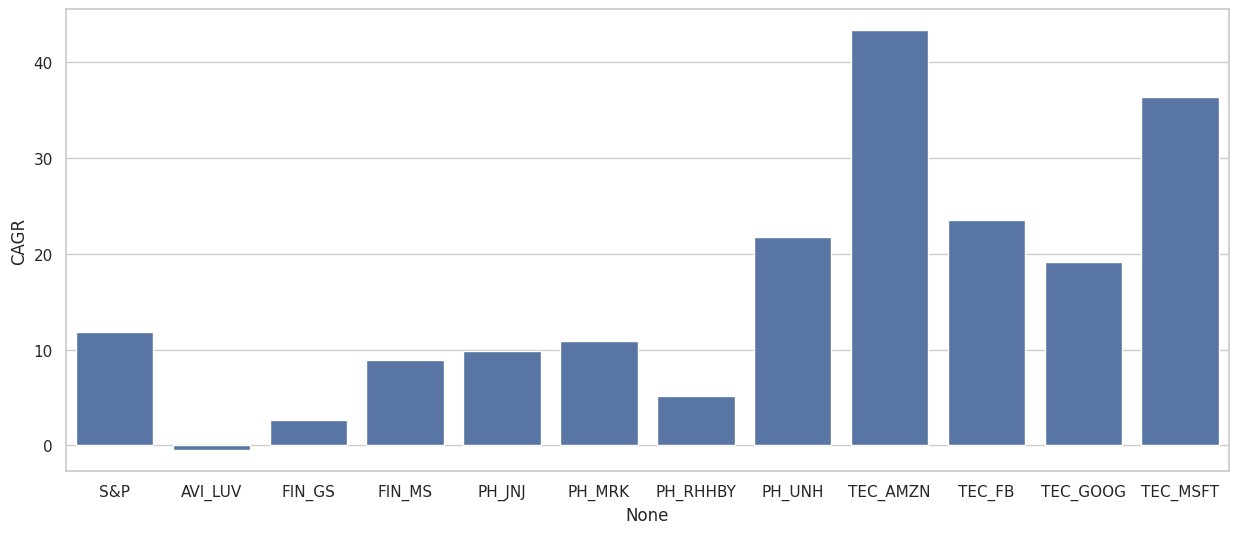

In [120]:
plt.figure(figsize = (15,6))
sns.barplot(data = RM,x = RM.index,y = RM['CAGR'])
plt.show()

The CAGR for AVI_LUV are negative as we discussed earlier that Aviation has been a loss making sector from past 5 years atleast. The CAGR for the IT sector are easily beating the market and can be termed as the most profitable sector.

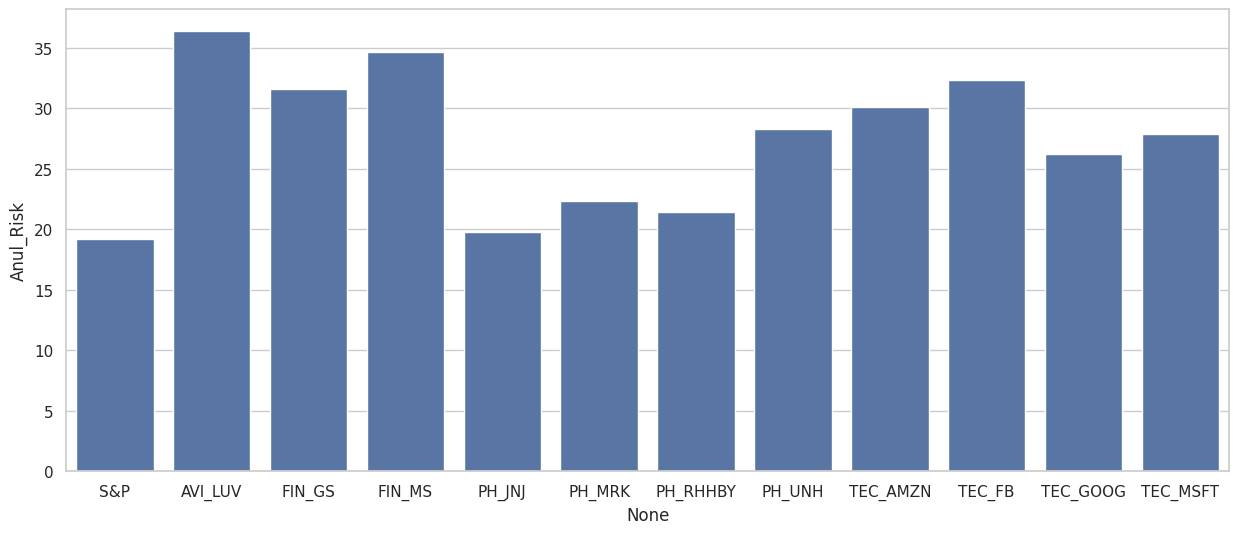

In [121]:
plt.figure(figsize = (15,6))
sns.barplot(data = RM,x = RM.index,y = RM['Anul_Risk'])
plt.show()

The Annual risks for each sector is visibly higher than that offered by the market. Hence selection criteria cannot solely be Risks.

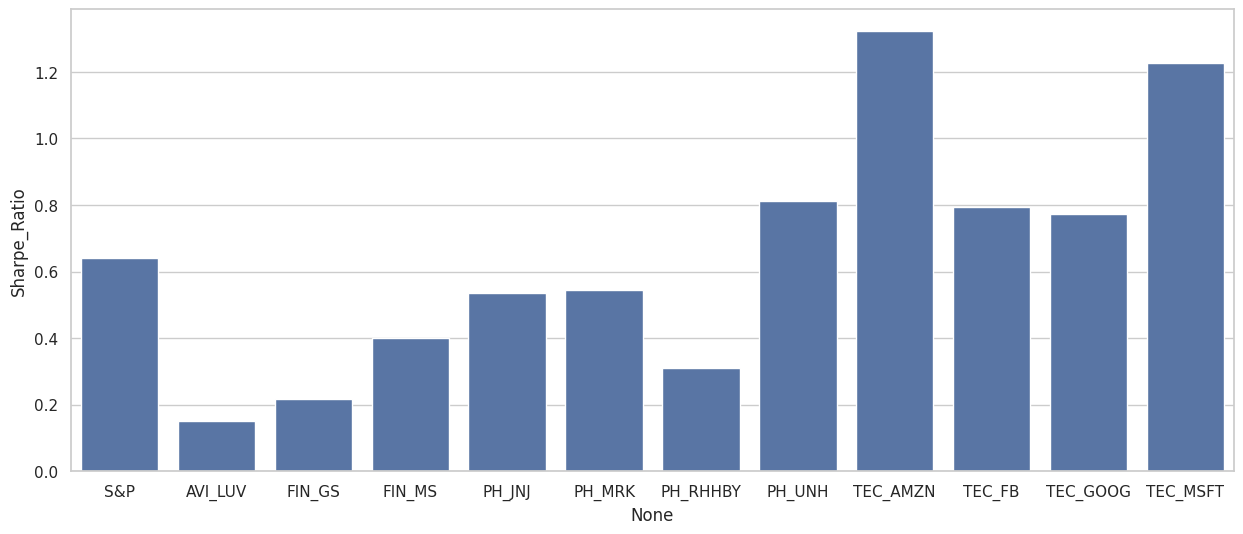

In [122]:
plt.figure(figsize = (15,6))
sns.barplot(data = RM,x = RM.index,y = RM['Sharpe_Ratio'])
plt.show()

A higher Sharpe ratio tells that the stock is doing well.

In [123]:
Final_RM = RM.loc[['S&P','PH_MRK','PH_UNH','TEC_AMZN','TEC_FB','TEC_GOOG','TEC_MSFT']].copy()
Final_RM

Avg_Rets  Avg_Risk     Min     Max  Anul_Rets  Anul_Risk    CAGR  \
S&P          0.052     1.208 -11.984   9.383     13.041     19.177  11.818   
PH_MRK       0.051     1.407  -8.899  10.408     12.883     22.331  10.936   
PH_UNH       0.094     1.781 -17.277  12.799     23.720     28.273  21.736   
TEC_AMZN     0.161     1.897  -7.922  13.216     40.585     30.112  43.320   
TEC_FB       0.105     2.035 -18.961  15.521     26.452     32.311  23.557   
TEC_GOOG     0.083     1.652 -11.101  10.449     21.019     26.225  19.176   
TEC_MSFT     0.139     1.754 -14.739  14.217     34.953     27.843  36.362   

          Cumm_Rets  Sharpe_Ratio  
S&P           0.748         0.641  
PH_MRK        0.680         0.543  
PH_UNH        1.674         0.812  
TEC_AMZN      5.047         1.323  
TEC_FB        1.880         0.795  
TEC_GOOG      1.404         0.773  
TEC_MSFT      3.715         1.228

The risk matrix contains only those stocks which perform better than S&P in CAGR and sharpe ratio will also be taken into account. The risk that they offer will be considered later according to clients risk appetite.

In [124]:
Final_RM.to_csv('Risk Matrix.csv')

## Portfolio

**Investor Persona**

In [125]:
data = {'Name':['Mr.Patrick Jyengar','Mr.Peter Jyengar'],'Age':[55,32],'Invt._Style':['Conservative','Aggressive'],
        'Invt.($)':[500000,1000000],'GOAL':[1000000,'Higher Returns']}
IP = pd.DataFrame(data).set_index('Name',drop = True) # Investor Persona
IP

Age   Invt._Style  Invt.($)            GOAL
Name                                                           
Mr.Patrick Jyengar   55  Conservative    500000         1000000
Mr.Peter Jyengar     32    Aggressive   1000000  Higher Returns

For *Mr.Patrick Jyengar*, we've selected **PH_MRK and TEC_MSFT or TEC_GOOG** stocks and for *Mr. Peter Jyengar*, **TEC_AMZN,TEC_MSFT and PH_UNH** are shorlisted

Considering *PH_MRK* as the one of the stock in Mr.Patrick J. portfolio and will decide the second stock by taking into account risk the combination of MRK offers with either MSFT or GOOG.

In [126]:
PJ1 = pd.DataFrame(index = range(0,11),columns = ['TEC_MSFT','TEC_GOOG','PH_MRK']).fillna(0)
for i in range(0,11):
    PJ1.iloc[i,0] = i*10
    PJ1.iloc[i,1] = i*10
    PJ1.iloc[i,2] = 100-(i*10)
    # Returns and Risk with MSFT and MRK stocks
    E1 = (((i/10)*Final_RM.loc['TEC_MSFT','Cumm_Rets'])+((1-(i/10))*Final_RM.loc['PH_MRK','Cumm_Rets']))
    PJ1.loc[i,'MSFT_Rets'] = 500000*(E1+1)
    R1 = (((i/10)*Final_RM.loc['TEC_MSFT','Anul_Risk'])+((1-(i/10))*Final_RM.loc['PH_MRK','Anul_Risk']))
    PJ1.loc[i,'MSFT_Risk'] = R1
    # Returns and Risk with GOOG and MRK stocks
    E2 = (((i/10)*Final_RM.loc['TEC_GOOG','Cumm_Rets'])+((1-(i/10))*Final_RM.loc['PH_MRK','Cumm_Rets']))
    PJ1.loc[i,'GOOG_Rets'] = 500000*(E2+1)
    R2 = (((i/10)*Final_RM.loc['TEC_GOOG','Anul_Risk'])+((1-(i/10))*Final_RM.loc['PH_MRK','Anul_Risk']))
    PJ1.loc[i,'GOOG_Risk'] = R2
PJ1

TEC_MSFT  TEC_GOOG  PH_MRK  MSFT_Rets  MSFT_Risk  GOOG_Rets  GOOG_Risk
0          0         0     100   840000.0    22.3310   840000.0    22.3310
1         10        10      90   991750.0    22.8822   876200.0    22.7204
2         20        20      80  1143500.0    23.4334   912400.0    23.1098
3         30        30      70  1295250.0    23.9846   948600.0    23.4992
4         40        40      60  1447000.0    24.5358   984800.0    23.8886
5         50        50      50  1598750.0    25.0870  1021000.0    24.2780
6         60        60      40  1750500.0    25.6382  1057200.0    24.6674
7         70        70      30  1902250.0    26.1894  1093400.0    25.0568
8         80        80      20  2054000.0    26.7406  1129600.0    25.4462
9         90        90      10  2205750.0    27.2918  1165800.0    25.8356
10       100       100       0  2357500.0    27.8430  1202000.0    26.2250

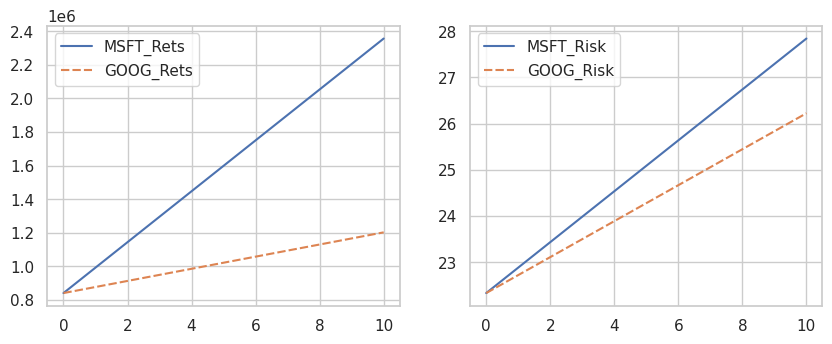

In [127]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.lineplot(data = PJ1[['MSFT_Rets','GOOG_Rets']])
plt.subplot(2,2,2)
sns.lineplot(data = PJ1[['MSFT_Risk','GOOG_Risk']])
plt.show()

From the above plot we conclude that MSFT is giving better returns than GOOG at the same risk, hence will go with **MSFT** as the second stock in Mr. Patrick J. basket.

**What is an acceptable level of inflation?**


*The Federal Reserve has not established a formal inflation target, but policymakers generally believe that an acceptable inflation rate is around 2 percent or a bit below.*
- source:  https://www.federalreserve.gov/faqs/5D58E72F066A4DBDA80BBA659C55F774.htm#:~:text=The%20Federal%20Reserve%20has%20not,percent%20or%20a%20bit%20below--

If Mr. Patrick Jyengar had planned for $1.0M after 5 years, we need to consider the inflation rate of 2% at worst.

In [128]:
IF1 = pd.DataFrame(index = [x for x in range(2020,2026)])
IF1.loc[2020,'Inf_Amt'] = IP.loc['Mr.Patrick Jyengar','Invt.($)']

In [129]:
for i in range(2020,2025):
    IF1.loc[(i+1),'Inf_Amt'] = ((IF1.loc[i,'Inf_Amt']*2)/100)+IF1.loc[i,'Inf_Amt']
IF1

Inf_Amt
2020  500000.0000
2021  510000.0000
2022  520200.0000
2023  530604.0000
2024  541216.0800
2025  552040.4016

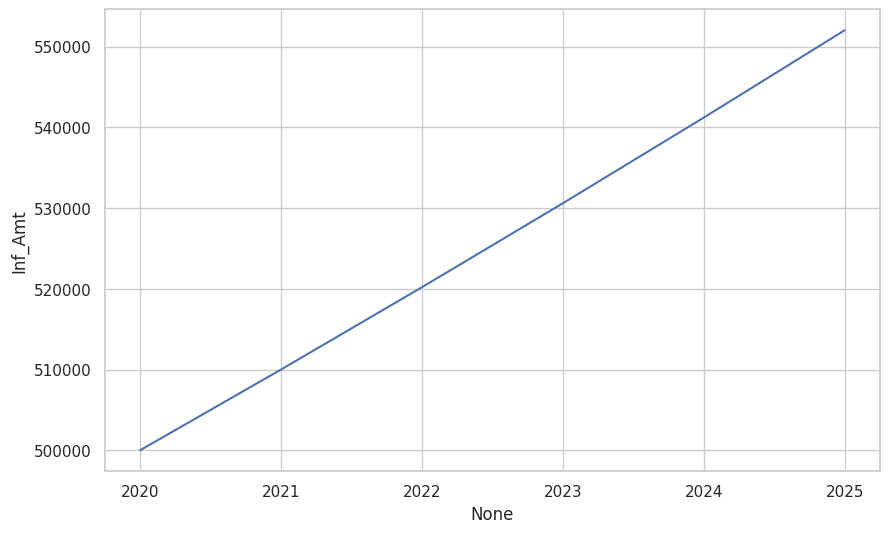

In [130]:
plt.figure(figsize = (10,6))
sns.lineplot(x = IF1.index,y = IF1['Inf_Amt'])
plt.show()

In [131]:
inf = (IF1.iloc[-1,0]-IF1.iloc[0,0]).round(3)
inf

52040.402

In [132]:
IR = ((inf/IP.loc['Mr.Patrick Jyengar','Invt.($)'])*100).round(2)
IR

10.41

A 2% inflation per year will result as 10.41% after 5 years

In [133]:
INF = IP.loc['Mr.Patrick Jyengar','GOAL']*IR/100
INF

104100.0

In [134]:
# Updated Goal for Mr. Patrick Jyengar
Pat_Goal = IP.loc['Mr.Patrick Jyengar','GOAL'] + INF
Pat_Goal

1104100.0

In [135]:
PJ1 = PJ1.loc[2:4,['TEC_MSFT','PH_MRK','MSFT_Rets','MSFT_Risk']]
PJ1

TEC_MSFT  PH_MRK  MSFT_Rets  MSFT_Risk
2        20      80  1143500.0    23.4334
3        30      70  1295250.0    23.9846
4        40      60  1447000.0    24.5358

Since Mr.Patrick Jyengar is conservative investor and has a goal to double his investments of 500,000 to 10,00,000.
Will go with minimum possible risk with an intention of reaching his goal, considering the inflation.


In [136]:
PJ1 = PJ1.iloc[0:1].reset_index(drop = True)
PJ1

TEC_MSFT  PH_MRK  MSFT_Rets  MSFT_Risk
0        20      80  1143500.0    23.4334

**Reducing Risk for Mr.Patrick Jyengar thereby achieving his goal of 10,00,000** **i.e 1.0M$**

In [137]:
Returns = ((PJ1['MSFT_Rets']-IP.loc['Mr.Patrick Jyengar','Invt.($)'])/IP.loc['Mr.Patrick Jyengar','Invt.($)']) *100
Risk = PJ1['MSFT_Risk']-Final_RM.loc['S&P','Anul_Risk']
Returns,Risk

(0    128.7
 Name: MSFT_Rets, dtype: float64,
 0    4.2564
 Name: MSFT_Risk, dtype: float64)

Mr.Patrick Jyengar is getting 128.7% returns with a risk of 4.25% more than the market viz. S&P500. Also the returns beats the inflation sufficiently enough.

**Mr.Peter Jyengar**

In [138]:
IF2 = pd.DataFrame(index = [x for x in range(2020,2026)])
IF2.loc[2020,'Inf_Amt'] = IP.loc['Mr.Peter Jyengar','Invt.($)']

In [139]:
for i in range(2020,2025):
    IF2.loc[(i+1),'Inf_Amt'] = ((IF2.loc[i,'Inf_Amt']*2)/100)+IF2.loc[i,'Inf_Amt']
IF2

Inf_Amt
2020  1.000000e+06
2021  1.020000e+06
2022  1.040400e+06
2023  1.061208e+06
2024  1.082432e+06
2025  1.104081e+06

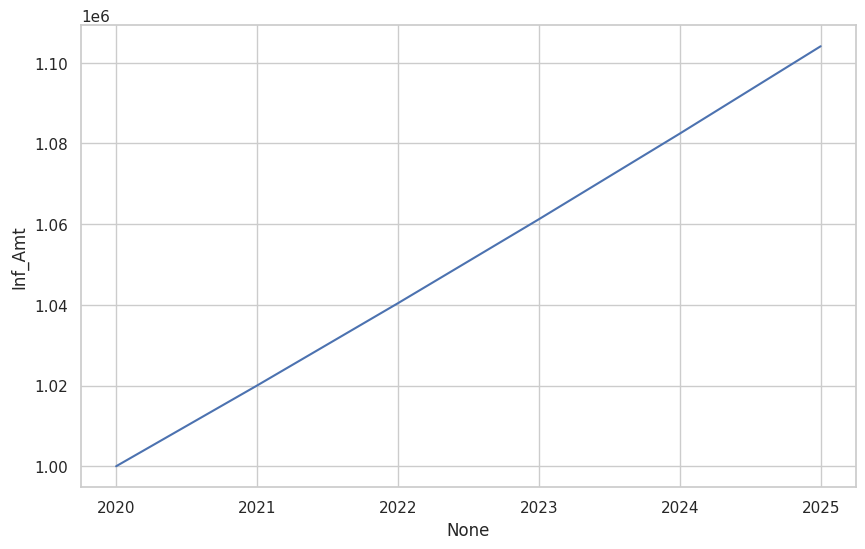

In [140]:
plt.figure(figsize = (10,6))
sns.lineplot(x = IF2.index,y = IF2['Inf_Amt'])
plt.show()

Considering same 10.41% as inflation rate over 5 years period for Mr.Peter J. and as his of higher returns we consider him to get 5 times return on his investments.

In [141]:
INF = 5*(IP.loc['Mr.Peter Jyengar','Invt.($)'])*IR/100 # 5X returns + inflation
INF

520500.0

In [142]:
# Updated Goal for Mr. Peter Jyengar
Pet_Goal =  5*(IP.loc['Mr.Peter Jyengar','Invt.($)']) + INF
Pet_Goal

5520500.0

- In order to have a diverse profile for Mr.Peter J. we consider **AMZN and MSFT from Tech. and UNH from Pharma** as they've higher returns and his wish to take higher risk is also maintained.
- The reason to select three stocks for Mr. Peter J. is, he is aggressive investor and we need to diversify his profile so that the high risk is balanced among these three stocks across two sector.

In [143]:
PJS1 = pd.DataFrame(index = range(0,11),columns = ['TEC_MSFT','PH_UNH','TEC_AMZN']).fillna(0)
for i in range(0,11):
    a = PJS1.iloc[i,0] = i*5
    b = PJS1.iloc[i,1] = i*5
    c = PJS1.iloc[i,2] = 100-(i*10)
    # Returns and Risk with TEC_MSFT,PH_UNH and TEC_AMZN
    E1 = ((a/100)*Final_RM.loc['TEC_MSFT','Cumm_Rets'])+((b/100)*Final_RM.loc['PH_UNH','Cumm_Rets'])+((c/100)*Final_RM.loc['TEC_AMZN','Cumm_Rets'])
    PJS1.loc[i,'Returns'] = 1000000*(E1+1)
    R1 = (((a/100)*Final_RM.loc['TEC_MSFT','Anul_Risk'])+((b/100)*Final_RM.loc['PH_UNH','Anul_Risk'])+((c/100)*Final_RM.loc['TEC_AMZN','Anul_Risk']))
    PJS1.loc[i,'Risk'] = R1
PJS1

TEC_MSFT  PH_UNH  TEC_AMZN    Returns     Risk
0          0       0       100  6047000.0  30.1120
1          5       5        90  5811750.0  29.9066
2         10      10        80  5576500.0  29.7012
3         15      15        70  5341250.0  29.4958
4         20      20        60  5106000.0  29.2904
5         25      25        50  4870750.0  29.0850
6         30      30        40  4635500.0  28.8796
7         35      35        30  4400250.0  28.6742
8         40      40        20  4165000.0  28.4688
9         45      45        10  3929750.0  28.2634
10        50      50         0  3694500.0  28.0580

In [144]:
PJS2 = pd.DataFrame(index = range(0,11),columns = ['TEC_MSFT','PH_UNH','TEC_AMZN']).fillna(0)
for i in range(0,11):
    a = PJS2.iloc[i,0] = i*5
    b = PJS2.iloc[i,1] = 100-(i*10)
    c = PJS2.iloc[i,2] = i*5
     # Returns and Risk with TEC_MSFT,PH_UNH and TEC_AMZN
    E1 = ((a/100)*Final_RM.loc['TEC_MSFT','Cumm_Rets'])+((b/100)*Final_RM.loc['PH_UNH','Cumm_Rets'])+((c/100)*Final_RM.loc['TEC_AMZN','Cumm_Rets'])
    PJS2.loc[i,'Returns'] = 1000000*(E1+1)
    R1 = (((a/100)*Final_RM.loc['TEC_MSFT','Anul_Risk'])+((b/100)*Final_RM.loc['PH_UNH','Anul_Risk'])+((c/100)*Final_RM.loc['TEC_AMZN','Anul_Risk']))
    PJS2.loc[i,'Risk'] = R1
PJS2

TEC_MSFT  PH_UNH  TEC_AMZN    Returns      Risk
0          0     100         0  2674000.0  28.27300
1          5      90         5  2944700.0  28.34345
2         10      80        10  3215400.0  28.41390
3         15      70        15  3486100.0  28.48435
4         20      60        20  3756800.0  28.55480
5         25      50        25  4027500.0  28.62525
6         30      40        30  4298200.0  28.69570
7         35      30        35  4568900.0  28.76615
8         40      20        40  4839600.0  28.83660
9         45      10        45  5110300.0  28.90705
10        50       0        50  5381000.0  28.97750

In [145]:
PJS3 = pd.DataFrame(index = range(0,11),columns = ['TEC_MSFT','PH_UNH','TEC_AMZN']).fillna(0)
for i in range(0,11):
    a = PJS3.iloc[i,0] = 100-(i*10)
    b = PJS3.iloc[i,1] = i*5
    c = PJS3.iloc[i,2] = i*5
     # Returns and Risk with TEC_MSFT,PH_UNH and TEC_AMZN
    E1 = ((a/100)*Final_RM.loc['TEC_MSFT','Cumm_Rets'])+((b/100)*Final_RM.loc['PH_UNH','Cumm_Rets'])+((c/100)*Final_RM.loc['TEC_AMZN','Cumm_Rets'])
    PJS3.loc[i,'Returns'] = 1000000*(E1+1)
    R1 = (((a/100)*Final_RM.loc['TEC_MSFT','Anul_Risk'])+((b/100)*Final_RM.loc['PH_UNH','Anul_Risk'])+((c/100)*Final_RM.loc['TEC_AMZN','Anul_Risk']))
    PJS3.loc[i,'Risk'] = R1
PJS3

TEC_MSFT  PH_UNH  TEC_AMZN    Returns      Risk
0        100       0         0  4715000.0  27.84300
1         90       5         5  4679550.0  27.97795
2         80      10        10  4644100.0  28.11290
3         70      15        15  4608650.0  28.24785
4         60      20        20  4573200.0  28.38280
5         50      25        25  4537750.0  28.51775
6         40      30        30  4502300.0  28.65270
7         30      35        35  4466850.0  28.78765
8         20      40        40  4431400.0  28.92260
9         10      45        45  4395950.0  29.05755
10         0      50        50  4360500.0  29.19250

In [146]:
PJ2 = pd.concat([PJS1.loc[2:1:-1]],axis = 0).reset_index(drop = True)
PJ2

TEC_MSFT  PH_UNH  TEC_AMZN    Returns     Risk
0        10      10        80  5576500.0  29.7012
1         5       5        90  5811750.0  29.9066

The goal of higher returns i.e. $ 5520500.0 will only be achieved from above two combination rest either dont give better returns of are not diversified.

Since the sole purpose of Mr.Peter Jyengar investing is to get higher returns at high risk, we've many choice of combinations of Stocks,
which fulfils his goal. Although he is open to take risk, we as his Fund Advisor will consider him to getting exposed to a safe risk investments.
Let's consider for him taking a risk of around 10 to 11% more than market.

In [147]:
PJ2 = PJ2.iloc[0:1].reset_index(drop = True)
PJ2

TEC_MSFT  PH_UNH  TEC_AMZN    Returns     Risk
0        10      10        80  5576500.0  29.7012

In [148]:
Returns = ((PJ2['Returns']-IP.loc['Mr.Peter Jyengar','Invt.($)'])/IP.loc['Mr.Peter Jyengar','Invt.($)']) *100
Risk = PJ2['Risk']-Final_RM.loc['S&P','Anul_Risk']
Returns,Risk

(0    457.65
 Name: Returns, dtype: float64,
 0    10.5242
 Name: Risk, dtype: float64)

Mr. Peter Jyengar will be getting a returns of whopping 457.65% after five years on his investments with as added risk of 10.52% over the market risk.

In [149]:
IP.loc['Mr.Patrick Jyengar','Exp_Rets'] = PJ1.loc[0,'MSFT_Rets']
IP.loc['Mr.Patrick Jyengar','Exp_Risk'] = PJ1.loc[0,'MSFT_Risk']
IP.loc['Mr.Peter Jyengar','Exp_Rets'] = PJ2.loc[0,'Returns']
IP.loc['Mr.Peter Jyengar','Exp_Risk'] = PJ2.loc[0,'Risk']
IP

Age   Invt._Style  Invt.($)            GOAL   Exp_Rets  \
Name                                                                         
Mr.Patrick Jyengar   55  Conservative    500000         1000000  1143500.0   
Mr.Peter Jyengar     32    Aggressive   1000000  Higher Returns  5576500.0   

                    Exp_Risk  
Name                          
Mr.Patrick Jyengar   23.4334  
Mr.Peter Jyengar     29.7012

**Mr.Patrick Jyengar Portfolio**

In [150]:
Pat_PF = Final_RM.loc[['PH_MRK','TEC_MSFT'],['Anul_Rets','Anul_Risk']]
Pat_PF

Anul_Rets  Anul_Risk
PH_MRK       12.883     22.331
TEC_MSFT     34.953     27.843

In [151]:
Pat_PF.loc['PH_MRK','Invested'] = 0.85*IP.iloc[0,2]
Pat_PF.loc['TEC_MSFT','Invested'] = 0.15*IP.iloc[0,2]
Pat_PF.loc['PH_MRK','CAGR'] = Final_RM.loc['PH_MRK','CAGR']
Pat_PF.loc['TEC_MSFT','CAGR'] = Final_RM.loc['TEC_MSFT','CAGR']
Pat_PF = Pat_PF.round(3)
Pat_PF

Anul_Rets  Anul_Risk  Invested    CAGR
PH_MRK       12.883     22.331  425000.0  10.936
TEC_MSFT     34.953     27.843   75000.0  36.362

**Mr. Peter Jyengar Portfolio**

In [152]:
Pet_PF = Final_RM.loc[['TEC_MSFT','PH_UNH','TEC_AMZN'],['Anul_Rets','Anul_Risk']]
Pet_PF

Anul_Rets  Anul_Risk
TEC_MSFT     34.953     27.843
PH_UNH       23.720     28.273
TEC_AMZN     40.585     30.112

In [153]:
Pet_PF.loc['PH_UNH','Invested']   = 0.1*IP.iloc[1,2]
Pet_PF.loc['TEC_MSFT','Invested'] = 0.1*IP.iloc[1,2]
Pet_PF.loc['TEC_AMZN','Invested'] = 0.8*IP.iloc[1,2]
Pet_PF.loc['PH_UNH','CAGR']   = Final_RM.loc['PH_UNH','CAGR']
Pet_PF.loc['TEC_MSFT','CAGR'] = Final_RM.loc['TEC_MSFT','CAGR']
Pet_PF.loc['TEC_AMZN','CAGR'] = Final_RM.loc['TEC_AMZN','CAGR']
Pet_PF = Pet_PF.round(3)
Pet_PF

Anul_Rets  Anul_Risk  Invested    CAGR
TEC_MSFT     34.953     27.843  100000.0  36.362
PH_UNH       23.720     28.273  100000.0  21.736
TEC_AMZN     40.585     30.112  800000.0  43.320

In [155]:
# Exporting Portfolios
Pat_PF.to_csv('Patrick_Jyengar_PF.csv')
Pet_PF.to_csv('Peter_Jyengar_PF.csv')